# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

file_path = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(file_path,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(file_path)

In [3]:
df = pd.read_csv('DSM/DSM_hr_avg.csv',header=0, skipinitialspace=True)
# df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
df['type']='default'
df = df.dropna()

In [4]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


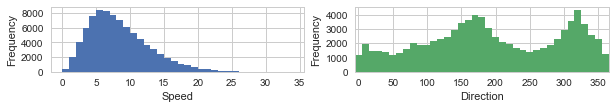

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
df['speed_origin'] = df['speed']
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date            Hr         speed           dir     speed_max  \
count  8.400800e+04  84008.000000  84008.000000  84008.000000  84008.000000   
mean   2.010612e+07     11.499191      8.409010    193.391922     13.993239   
std    2.867431e+04      6.916346      4.428955     99.483503      7.001358   
min    2.006010e+07      0.000000      0.000000      0.004358      0.000000   
25%    2.008073e+07      6.000000      5.100000    116.566916      9.000000   
50%    2.011012e+07     12.000000      7.666667    193.840853     13.000000   
75%    2.013072e+07     17.000000     11.000000    282.007079     18.000000   
max    2.015123e+07     23.000000     33.016667    359.999699    177.000000   

               HrMn         month  speed_origin  dir_windrose  
count  84008.000000  84008.000000  84008.000000  84008.000000  
mean    1149.919055      6.537627      8.409010    194.595412  
std      691.634632      3.457968      4.428955    100.048577  
min        0.000000      1.000000      0.000000      0.002516  
25%      600.000000      4.000000      5.100000    121.767254  
50%     1200.000000      7.000000      7.666667    184.752620  
75%     1700.000000     10.000000     11.000000    292.417138  
max     2300.000000     12.000000     33.016667    359.998584

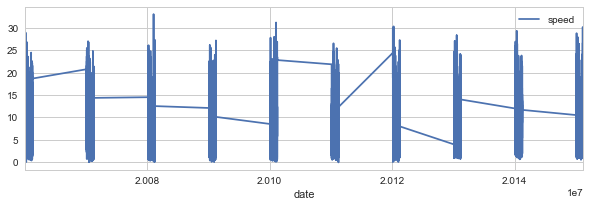

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


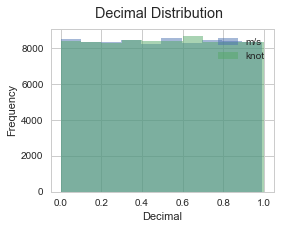

In [8]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

In [9]:
knot_unit = True

### 1.2.2 Sampling Type Selection

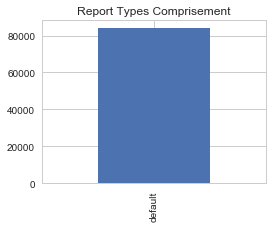

In [10]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

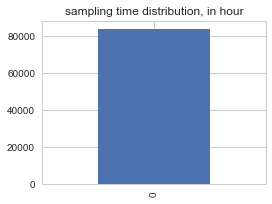

In [11]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [12]:
df['HrMn'].value_counts().sort_index()

0       3495
100     3491
200     3488
300     3493
400     3502
500     3499
600     3511
700     3507
800     3503
900     3502
1000    3505
1100    3507
1200    3504
1300    3507
1400    3505
1500    3508
1600    3511
1700    3510
1800    3503
1900    3501
2000    3493
2100    3489
2200    3488
2300    3486
Name: HrMn, dtype: int64

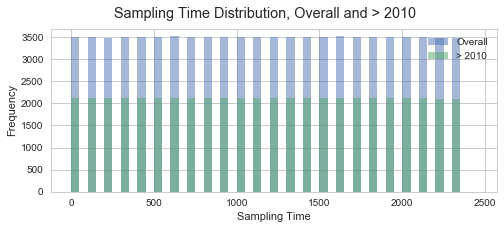

In [13]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [14]:
# display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
# df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

#### 1.3.1.2 sudden increase in speed

In [15]:
# # sudden increse
# df['incre'] = df.speed.diff(1)
# df['incre'].fillna(0, inplace=True)
# df['incre_reverse'] = df.speed.diff(-1)
# df['incre_reverse'].fillna(0, inplace=True)

# display(df.sort_values(by='speed',ascending=False).head(10))
# df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
# incre_threshold = 20 if knot_unit else 10
# print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
# df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

After Simple Aretefacts Handling

In [17]:
# Check the max speed
# df.sort_values(by='speed',ascending=False).head(10)

### 1.3.2 0 Speed

In [18]:
# with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
# delete_zero = with_too_many_zero
# if delete_zero:
#     df = df.query('(speed > 0)')
# print(delete_zero, null_wind_frequency)

### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [19]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
try:
    SECTOR_LENGTH = 360/len(effective_column) 
except: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.004358      1
0.029703      1
0.030155      1
0.044356      1
0.046472      1
0.053212      1
0.059094      1
0.062419      1
0.062981      1
0.066147      1
0.067689      1
0.071320      1
0.077413      1
0.083907      1
0.112401      1
0.116046      1
0.116426      1
0.132158      1
0.139575      1
0.143694      1
0.166014      1
0.166922      1
0.169509      1
0.170766      1
0.172056      1
0.174057      1
0.200199      1
0.200371      1
0.201524      1
0.213795      1
             ..
359.809169    1
359.825402    1
359.833499    1
359.843560    1
359.846766    1
359.849459    1
359.857325    1
359.864796    1
359.882826    1
359.885865    1
359.890010    1
359.893751    1
359.910112    1
359.916623    1
359.918286    1
359.926079    1
359.930001    1
359.934807    1
359.941728    1
359.944240    1
359.944681    1
359.946257    1
359.946821    1
359.957781    1
359.965852    1
359.969871    1
359.980870    1
359.984761    1
359.987701    1
359.999699    1
Name: dir, dtype: int64

0 10


In [20]:
# df=realign_direction(df, effective_column)
# df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.4 Time Shift Comparison

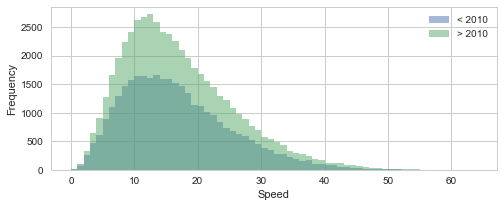

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

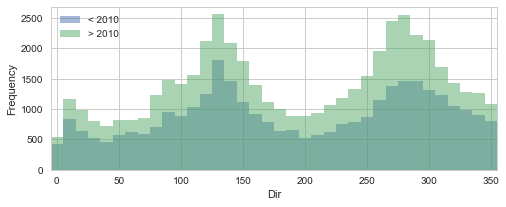

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

2006 - 2009


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


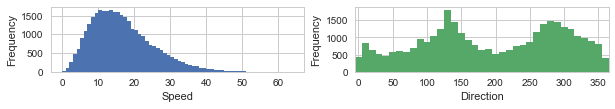

2010 - 2014


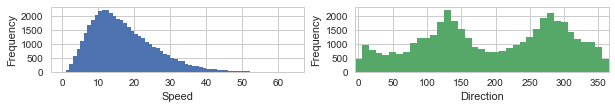

2015 - 2015


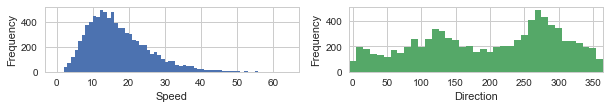

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [24]:
# Randomize the angle degree, to form a better KDE estimation
# df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [25]:
# if delete_zero:
#     redistribute_method = 'down'
# else:
#     redistribute_method = 'up'


# df, speed_redistribution_info = randomize_speed(df, redistribute_method)
# df, speed_redistribution_info = randomize_speed(df, 'up')

## 1.5 Generate (x,y) from (speed,dir)

In [26]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [27]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [28]:
## Summery of the data selection
print('Knot unit?', knot_unit)
# print('Incre_threshold for artefact detection:', incre_threshold) 
# print('delete_zero?', delete_zero)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: default
Sampling time used: [0]


date            Hr         speed           dir     speed_max  \
count  4.236800e+04  42368.000000  42368.000000  42368.000000  42368.000000   
mean   2.012079e+07     11.498985     16.388005    192.918405     14.142254   
std    1.419636e+04      6.914767      8.712011     98.627823      7.099932   
min    2.010010e+07      0.000000      0.000000      0.029703      0.000000   
25%    2.011040e+07      6.000000     10.000000    117.016405      9.000000   
50%    2.012071e+07     11.000000     15.000000    192.224525     13.000000   
75%    2.013101e+07     17.000000     22.000000    280.949440     18.000000   
max    2.014123e+07     23.000000     61.000000    359.980870     79.000000   

               HrMn         month  speed_origin  dir_windrose       decimal  \
count  42368.000000  42368.000000  42368.000000  42368.000000  42368.000000   
mean    1149.898508      6.521478      8.429866    196.455650      0.499670   
std      691.476718      3.459132      4.478298    100.154076      0.288634   
min        0.000000      1.000000      0.000000      0.004616      0.000000   
25%      600.000000      4.000000      5.083333    124.984781      0.248385   
50%     1100.000000      7.000000      7.650000    186.434609      0.501083   
75%     1700.000000     10.000000     11.083333    294.869831      0.749464   
max     2300.000000     12.000000     31.150000    359.998584      0.999463   

                  x             y  
count  42368.000000  42368.000000  
mean      -1.687269     -0.505759  
std       11.729481     14.275458  
min      -60.998278    -50.930090  
25%       -8.531500    -10.812913  
50%       -0.827657     -0.857008  
75%        6.756268      9.792377  
max       37.470753     51.620905

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


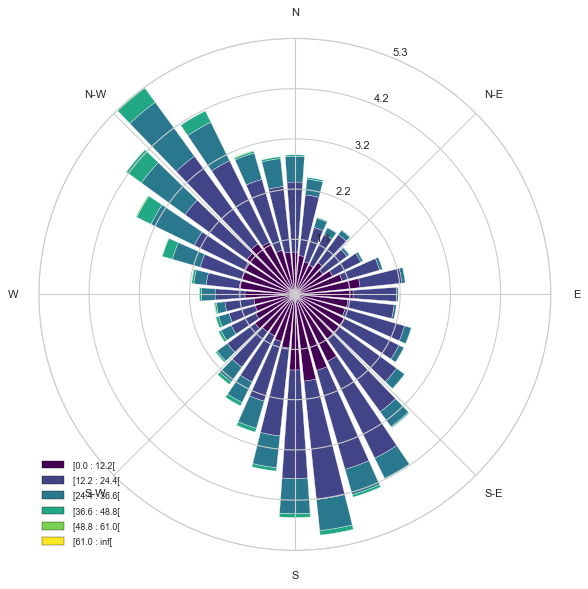

In [29]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [30]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAS0AAADpCAYAAABx7WH4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAG69JREFUeJzt3XtQVPehB/DvvgCRiFJdFtPJ1cYEq1KtSYn0VoMoyAoK
UUnFV0PbOE6nY2sSNIYx1kQ0QTMmXFI7bW/R0ky90iYVCtxeqyahmOBg1a4aNbFN1YSwC6gREPd1
7h+4KwRxF7Nnz+v7mckMZ/fH2e+y8Tu/c/Y8dIIgCCAiUgi91AGIiAaDpUVEisLSIiJFYWkRkaKw
tIhIUVhaRKQoLC0iUpSwlFZHRwfmzZuHS5cu9XuupaUFy5cvh9VqxYoVK9DW1haOSESkUKKX1rFj
x5Cfn49//etft31+06ZNWLBgAerq6jB//nwUFxeLHYmIFEz00tq7dy82btwIs9nc7zmXy4XGxkZk
Z2cDAHJzc/H222/D5XKJHYuIFMoo9gts3bp1wOeuXLmCoUOHwmQy9YQxGhETE4P29nbEx8cP+Hte
rxdutxt6vR46nS7kmYlIOoIgwOv1wmg0Qq/vP68SvbTuxOv13vbx2wXtze12w2aziRGJiGQiKSkJ
ERER/R6XtLTi4uLQ0dEBt9sNo9EIt9uNzs5ODB8+/I6/5yu1CRMmwGAw3HGsx+PB6dOngxobTnLM
JcdMgDxzyTEToI5cvrEDTV4kLS2TyYTk5GRUV1fjscceQ3V1NZKTk/2biwPxbRJGREQE9QcIdmw4
yTGXHDMB8swlx0yAOnL5xg6060eS47SKiopw4MABAMDGjRuxb98+ZGVlobKyEhs2bJAiEhEpRNhm
WgcPHvT/3PuwhoSEBOzatStcMYhI4XhEPBEpCkuLiBRF9aX138f+G9tPbgevKk2kDqovrVcbX8We
j/egpbNF6ihEFAKqLy2Tvufwieuu6xInIaJQUH1pRRojAQDdnm6JkxBRKKi+tKKMUQCAG+4bEich
olBQfWlFGm7OtNycaRGpgepLyzfTYmkRqYNmSuuGh5uHRGqg+tLybR5ynxaROqi+tLh5SKQumikt
bh4SqYPqSyvC2HPlQ860iNRB9aUVZeDmIZGaqL+0uE+LSFU0U1rcp0WkDqovLf+5h5xpEamC6kuL
+7SI1EX9pXVz89DpcUqchIhCQfWlxc1DInVRfWnx20MidVF9afHSNETqov7Surl5yEMeiNRB9aXF
zUMidWFpEZGiaKa0uHlIpA6il1ZdXR2ysrKQkZGBsrKyfs9funQJS5cuRU5ODpYtW4ZPPvkkpK/P
iwASqYuopeVwOFBSUoKKigrU1NSgqakJ9fX1fca89tprmDt3Lvbt24c5c+Zgx44dIc3AzUMidRG1
tBoaGjBt2jTExcXBZDIhNzcXtbW1fcZ4vV50dnYCALq7uxEVFRXSDLyFGJG6GMVcud1uh9ls9i+b
zWa0tPS9Pf1PfvITLF68GBUVFXC73dizZ0/Q6/d4PAHHGG++xW53d1Djw8WXhZkCk2MuOWYC1JEr
0BhRS8vr9fZ7TKfT9Vlet24dXnjhBcyePRt/+ctf8OMf/xhVVVX9xt2OzWYLnEHoydDp7MTx48eD
TB4+wbyHcJNjJkCeueSYCVB3LlFLy2Kx4MiRI/5lu90Oi8XiX25vb8c///lPzJ49GwAwZ84cbNy4
EZcvX0ZcXFzA9SclJcFgMNxxjMfjganOBJfgwpQpU+7ynYSex+OBzWYL6j2EixwzAfLMJcdMgDpy
+cYORNTSSklJQWlpKVpbWxEbG4uqqirk5+f7nx8xYgQiIyPR2NiIRx55BEePHkV0dDRGjBgR1PoN
BkNQH0yEPgKd7k7o9fqgZnDhFOx7CCc5ZgLkmUuOmQB15xK1tOLj41FYWIiCggI4nU6kpaUhPT0d
RUVFSEtLw6xZs1BWVoYXX3wR3d3dGDp0KEpLS0NeLBH6CHSiEzc8N/w75olImUQtLQCwWq2wWq19
HisuLvb//I1vfAOVlZWiZojQ37ojD0uLSNlUf0Q8wANMidREE6Vl0psA8ABTIjXQRGlF6nlNLSK1
0ERpRRh4l2kitdBGad3cEc8rPRApn6ZKizMtIuVjaRGRomiqtHjIA5HyaaO0uCOeSDU0UVo85IFI
PTRRWr6ZFr89JFI+bZQWd8QTqQZLi4gUhaVFRIqiqdLiIQ9EyqeN0uIhD0SqoYnS4iEPROqhidLi
IQ9E6qGN0uKOeCLVYGkRkaJoqrS4eUikfNooLX57SKQa2igtbh4SqYYmSouHPBCphyZKy3cLMR4R
T6R8migt381aOdMiUj5NlBb3aRGph+ilVVdXh6ysLGRkZKCsrKzf83a7HStXrkROTg4WL16MS5cu
hTyDb6bFQx6IlE/U0nI4HCgpKUFFRQVqamrQ1NSE+vr6PmPWrl2LmTNnYt++fcjJyUFJSUnIc/j2
aXGmRaR8opZWQ0MDpk2bhri4OJhMJuTm5qK2ttb/fHt7O86cOYPFixcDABYuXIinnnoq5DkMOgOM
eiNLi0gFjGKu3G63w2w2+5fNZjNaWlr8yxcvXsTo0aPx0ksv4b333kNCQgKef/75oNfv8XiCHhNl
jEKHswNutxs6nW4Q70IcvlzBvIdwkWMmQJ655JgJUEeuQGNELS2v19vvsd6F4Xa7cerUKfzoRz/C
+vXrUVlZiWeffRYVFRVBrd9mswWdxSAYAABNx5r8m4tyMJj3EC5yzATIM5ccMwHqziVqaVksFhw5
csS/bLfbYbFY/MujRo1CdHQ0Zs+eDQDIzs7G5s2bg15/UlISDAbDHcd4PB7YbDbERMXgqusqEicm
YljksEG+k9Dz5QrmPYSLHDMB8swlx0yAOnL5xg5E1NJKSUlBaWkpWltbERsbi6qqKuTn5/ufv+++
+5CQkICDBw8iLS0N77zzDiZMmBD0+g0GQ9AfTJQxCgDgElyy+jAH8x7CRY6ZAHnmkmMmQN25RN0R
Hx8fj8LCQhQUFCA7OxuJiYlIT09HUVERDhw4AAAoKytDeXk5srOzUV5eji1btoiSxX/YA4+KJ1I0
UWdaAGC1WmG1Wvs8Vlxc7P/5a1/7WtD7sL4M30yL3yASKZsmjogHgEgjT+UhUgPNlJZvpsWj4omU
TTOlxZOmidRBM6XFfVpE6hCwtBYtWuT/uaGhQdQwYmJpEalDwNJyu93+n7dv3y5qGDHxkAcidQhY
Wr1PuxEEQdQwYvLNtK67r0uchIi+jEHt05LDicZ3KzoiGgDQ6eyUOAkRfRkBDy7t6urCsWPHIAhC
n599pk6dKmrAUBkW0XO+4TXnNYmTENGXEbC0XC4Xnn76af9y7591Op3/dBy5850k/fmNzyVOQkRf
RsDSOnjwYDhyiO6eiHsAsLSIlC6ocw8FQUBDQwPOnTuHqKgoJCYm4qGHHhI7W0hxpkWkDgFLq62t
DU8++SQuXLiAMWPGQKfT4aOPPsKkSZOwc+dOxMTEhCPnl3ZPZM9Mi/u0iJQt4LeH27Ztw+TJk9HQ
0IA//OEPqKysxOHDhzF27Fhs27YtHBlDgpuHROoQcKZ14sQJ1NTUQK+/1W9DhgzBc889h7y8PFHD
hRI3D4nUIeBMKyIiok9h+URFRcFoFP1yXCHjK61rN7h5SKRkAUvrdoWlRJxpEalDwKnS1atXUV1d
PeBzShET0fOFAUuLSNkClta9996LvXv3DvicUhj1RkSbonHNeQ2CICj6lCQiLQtYWuG4fnu4DIsc
hi5XF7pcXRgaMVTqOER0FwLusHI6ndi2bRtWrVqFiooKRV/pgYc9EClfwNJ68cUXcfToUdx///14
4403sHPnznDkEgV3xhMpX8DSOnr0KH73u9+hsLAQu3fvxv79+8ORSxQsLSLlC1hakZGR/uOx4uPj
4fF4RA8lFv+

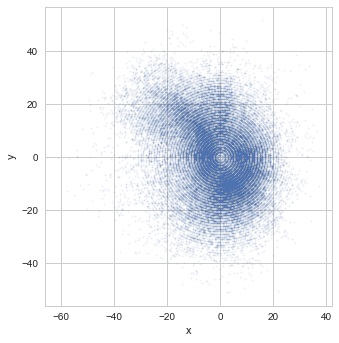

In [31]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2. Overview by Direction

In [32]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [33]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEX1JREFUeJzt3XtQE9fbB/BvBBFqVHCo2KkDFREoKBJviAi2Og5apOId
FeyIWujQFrzjBUSDikx16jhKUeCnBVEzCLYzXtqKFdtSaEEoBVSMVtQq4AWUQIAQzvuH476mBkjY
YCA+nxlmzOZk9znBb85mdzkrYIwxEEI6pZe+CyCkJ6MAEcIDBYgQHihAhPBAASKEBwoQITwYVIAU
CgW2b98ONzc3uLm5IS4uDkqlUmftAUAmk8HX1xe1tbVttomKioKDg4PKz/bt29tsf+PGDSxZsgSj
Ro2Cj48PLl++3HFnO7B8+fJXakhKSmqzfX5+PmbPng0XFxfMnTsXf//9N/fcjz/+iI0bN2pdw7Fj
x+Dt7Q2RSISQkBDcvXtX5fmffvoJ06dPh4uLC5YuXYqKigq16ykvL8eIESOQl5endQ1djhmQ2NhY
Nm3aNFZYWMh+++035uHhwQ4cOKCz9owxJhaL2TfffNNuG39/f3bw4EFWXV3N/dTV1altK5fLmZeX
F4uMjGRSqZQdOHCAjRw5kt2+fbvjDrfD09OTZWZmqtTQ0NCgtm1lZSUTiURs3759TCqVsujoaObm
5saePn3KtZk7dy7Ly8vTePvp6enM2dmZpaWlsZs3b7KYmBj24YcfcjWUlpayESNGsNTUVFZeXs6+
+OIL5u3tzRQKhcp6Wlpa2Jw5c5i9vT3Lzc3txDvRtQwmQI2NjWzUqFHswoUL3LKMjAzm7u7OlEol
7/aMMVZdXc1cXV1ZbW1tu7WMHz+eZWdna1R3ZmYmc3d3Z83NzdyygIAAFhsbq9Hr1amrq2P29vZM
KpVq1H7//v3Mz8+Pe9za2sqmTp3KUlJSVOoMCAjQuIaZM2cysVisss7p06cziUTCGGMsIiKChYaG
cs/X19czV1dXdvHiRZX1xMfHsyVLlnTbABnMLtzVq1chl8sxfvx4btnYsWPx+PFj3Llzh3d7ADh5
8iREIhEGDBjQZh0PHz5EbW0thg4dqlHdV65cgUgkQu/evbll48aNQ2FhoUavV0cqlcLY2BjW1tYa
tS8sLMS4ceO4xwKBAGPGjFGp4cMPP0RhYSGuX7+u0Trv3r2L0aNHq6zTwcEBV65cUbvNt956C87O
zigqKuKW3bhxA0ePHsW2bds02qY+GEyAqqqqYGZmhn79+nHL3n77bQBAZWUl7/YAcOnSJXh6erZb
h1QqhUAgwOHDhzF58mR89NFHSE5ORmtrq9r21dXVGDRokMoyS0tLVFVVtbudjmoQCoWIiIjApEmT
MGvWLGRmZrbZXpMaBgwYgJEjRyI7O1ujGiwtLV95H+/fv48nT54AeP7+q9vmi9colUpEREQgLCwM
gwcP1mib+mAwAZLL5ejTp4/KMhMTEwBAc3Mz7/ZKpRJlZWWws7Nrt45bt26hV69esLa2xqFDhxAU
FIQDBw4gMTFRq7rV1aCpmzdvorGxEe7u7khMTISfnx8iIyNx5swZXjXY2dmhpKREoxp8fX2RlJSE
4uJitLS0QCKRoLS0FAqFAgDQ2NjY7jYTExMhFAqxcOFCjbanL8b6LkBXTE1NX/mFv3hsZmbGu31t
bS2USiUsLCy4ZStWrEBBQQH3+MyZM1i8eDF8fHxgbm4OAHBwcMDTp09x5MgRfPrppxrXYWpqqraf
Pj4+uH//PvdY3a7e2rVrERISwu1qOjo64u7du0hJSYGPj0+nazA3N8etW7fU1vVfISEhqKyshL+/
PwBg4sSJ8PPzQ11dXbvbNDMzg1QqRXJyMtLT0yEQCDTanr4YTIAGDx6MhoYGyGQyCIVCAM+/jwCA
lZUV7/YvfpEv74rt2LEDjY2N3ONBgwZBIBBw4XnBzs4Ojx49glKphJGRkcpzVlZW3HZfePjwodoa
AODQoUNoaWlR+9wLRkZGr3xPGzZsGC5duqS2vaY1KJVK9Oql2U5Lnz59sGvXLkRFRUEul2PgwIEI
CwvDkCFD2t3muHHjcP78edTV1eHjjz9WeX7lypXw8/Nr95TA66bRu/HXX38hMDAQAFBWVgZPT08E
BgYiMDAQZ8+eBQBIJBLMmTMHCxYswM8//9x1FbfB0dERZmZmKiNCfn4+LC0t1X6Z1ra9hYUFjI2N
UVNTwy2zsrKCjY0N92NsbIwdO3Zg2bJlKq8tKSnBe++990p4AEAkEqGwsFAlFPn5+RCJRGr7+e67
76psU53PP/8cmzdvVllWWloKW1tbte1FIhHy8/O5x4wx7uDGy2pqarjviR356quvcOzYMZiZmWHg
wIGQy+XIzc2Fu7u72m02NDSgrKwMIpEIAQEBOHfuHE6fPo3Tp0/j+PHjAICYmBiEhYVptP3XpqPD
dIcOHWIzZ85k8+fPZ4wxJpFIWFJSkkqb6upqNnPmTNbU1MSePXvG/ft1E4vFbMqUKSw/P5/l5OQw
Dw8PlXM2NTU1rKamRuP2/zVv3jyWkJDQbg25ubnM0dGRJSQksIqKCpaZmclcXV3Zd999xxh7fl6j
urqayeVyxhhjMpmMeXh4sIiICCaVStnBgweZi4sLu3PnTqffh8zMTObk5MTS09NZRUUFO3LkCHN2
dmZ//vknY4yxpqYmVl1dzf2OHjx4wEaNGsX27NnDpFIp27ZtG5swYQJ79uyZynpnz57NkpOTGWPP
z19VV1ezlpYWtTWkpqYyd3d3lpeXx6RSKVu5ciVbuHAha21tZYwxVlxczJycnNiRI0e480AzZsxQ
uz6ZTNZtD2MLGGv/D+p++OEHODg4YP369ZBIJNi6dSv++ecfKJVK2NjYYNOmTcjLy0N2djY3tIaG
hiI4OBguLi7thvflT39daG5uxtGjR5Gbm4vevXvDy8sL/v7+3G6HWCwGAERGRmrU/r8yMjJw48YN
bNiwod06/vjjD2RkZODBgwewsLCAr68vpk6dCuD5bkpYWBiCg4MxefJkAMDt27eRnJyMiooKWFlZ
ISAgoMP3riMXLlzAuXPn8OjRI1hZWWH+/PncYeOysjLExMRgy5YtcHJyAvB8lPz2229RVVUFa2tr
LFu2TGXEamhoQHBwMOLi4vDOO+8gOzsbCQkJ2Ldvn9pRqbW1FRKJBNnZ2VAoFHB1dcUnn3yictQz
JycHEokEtbW1GD58OFasWKF217WxsRFBQUEq9b4OY8aM6bBNhwECgHv37mH16tWQSCQ4deoUHBwc
MGLECMTHx+PZs2dwdHREeXk51q1bBwBYv349/Pz8MHHixHbXq+sAdbUnT55gzZo1+Prrr9s9F2SI
srKykJubq7JrGBcXh+DgYIN9LzQJkNYHEaZNm4b+/ftz/xaLxRg7dizq6+u5NvX19SqfNHyL7E7m
zp2Lq1evIjQ0tN12BQUFPa5vbWGMQSwWIyIiAmPGjEFBQQEEAgEsLCwwZcoUfZenUy9+b5p+uGt9
Hmj58uUoLi4GAPz+++9wdnaGi4sLCgoK0NTUhLq6Oty8eRP29vbarrpHWL16Nc6ePdvuxaSG5vz5
87C3t8eECRO4ZS4uLoiPj9djVd2D1iNQdHQ0xGIxevfuDUtLS4jFYgiFQgQGBmLx4sVgjGHVqlWv
nCQzFP369WvzhKShmjFjBmbMmKGyzNjYYM6A8KLRuzBkyBBIJBIAgLOzM06cOPFKmwULFmDBggW6
rY6Qbs5gLuUhRB8oQITwQAEihAcKECE8UIAI4YECRAgPFCBCeKAAEcIDBYgQHihAhPBAASKEBwoQ
ITxQgAjhgQJECA8UIEJ4oAARwgMFiBAeKECE8EABIoQHraf2raiowKJFi7B48WJs3bqVmyta31P7
EqIPHQbo8OH

## 2.3 Overview by Month

In [34]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl4VOXZ/z+zzySzz2QPWQghIWEXUTBugIArLYrL29r+
qra1rVu1rVqLWO2ib921dlFrtdW6VK1KfcEFZRNEZCdk37eZJLPv6++POAMxhAQ4CUHzva5cMGd5
zjkz5/vcz3M/9/29RfF4PM44xjGOkwLiE30D4xjHOIaPccKOYxwnEcYJO45xnEQYJ+w4xnESYZyw
4xjHSYRxwo5jHCcRxgn7NcD4yt1XB+OEHQUsWLCAkpIS7r///sPub29vp6SkhJKSEmw2m6DX/uCD
D1i1alXy8xNPPMGsWbMEvYbH4+Hcc89lzZo1grY7joEYJ+woQSQS8f777x9239q1a0fsus8//zwW
i2XE2vd4PPz4xz+mo6NjxK4xjoMYJ+woYdasWbS1tVFZWTlg35o1aygpKTkBd3V82LZtGytWrKCq
qupE38rXBuOEHSVMmTKFCRMmDLCmHR0d7N27l6VLlw445/333+fSSy9l5syZnH322Tz66KNEIpHk
/gULFvD000+zatUq5s6dy+zZs7n99tvxeDwAXH311Wzbto2PP/6YkpIS2trakue+++67LFmyhGnT
prF8+XJ27NiR3NfW1kZJSQlPPPHEEZ/pJz/5CZMnT+aZZ545pu9kHEePccKOIhYvXjxgWLx27Vpm
zJhBZmZmv+2vvPIKN9xwA9OnT+fJJ5/k29/+Nn/729+44447+h33l7/8BZfLxcMPP8wtt9zCf//7
X/70pz8BsGrVKsrKypg9ezavvPIK6enpAPj9fh555BFuuukmHnvsMfx+PzfeeGOyM0hPT+eVV15h
xYoVR3yeF198kcceewyj0Xhc38s4hg/pib6BrxOWLl3Ks88+S319PUVFRUDfcPj888/vd1w0GuXR
Rx/lwgsvTDqMKioq0Gg0rFq1iuuuu47S0lIAMjMzefjhhxGJRFRUVLB+/XqeeeYZ5s6dy9lnn41a
rSYlJYVbb72VF154AejzGv/hD39g5syZAEQiEW688Ubq6uooLS1FLpcn9x0JkydPFuy7GcfwMG5h
RxHTpk0jKyuL9957D4DOzk727NnDkiVL+h3X0NCAzWYbMEy+8MILAdi+fXu/NkUiUfJzWloa0Gdd
3W73Ye9DIpEwffr05OecnByAQY8fx9jBOGFHESKRqN+weO3atUyfPp2srKx+xzmdTgBMJlO/7RqN
BrlcnpyjAqhUqgHXkEgkVFRU8Pvf//6w96FQKBCLD/70if/HYrFjfLJxjBbGCTvKWLx4Mfv376et
rY21a9cOGA4D6PV6AHp7e/ttd7lchEKh5P4j4Y477mDLli04HA5hbnwcYwLjhB1lzJ49m7S0NF5+
+WV27949YDgMUFhYiMFgGBCI8O677ybbGApqtZr77ruPpqamfp7lcZzcGHc6jTLEYjHnnXcef//7
35Nz2i9DIpFwww03cN9996HT6Vi4cCHV1dU88cQTLF26dNjOnoqKCtLS0ti5cycqlYpgMDis80Kh
EJWVlWRmZg7wXo/jxGLcwp4ALF68mHA4fNi11wS+/e1v89vf/pZPP/2U66+/nhdffJHvfe97PPjg
g0d1rXvvvRe/309PTw91dXXDOsdqtXLFFVfw2muvHdW1xjHyEI1rOn210NbWxne+8x3WrVuX3LZp
0yauvfZaPvzwQ3Jzc0/g3Y3jeDFO2HGM4yTC+JB4HOM4iTBO2HGM4yTCOGHHMY6TCOOE/QogFosR
DocJhUKEQiGCwSCBQIBAIEAwGCQUChEOh4lEImNGfcLj8XDxxRcnM4hqamq4/PLLWbp0KTfddBM+
n2/AOR0dHVx99dVccsklrFixggMHDoz2bZ9wjDudxjDi8XiSiOFwOPn3ZRIebUihRCJBJpMhk8mQ
y+XI5fLkZ5lMhkKhQCoduSX6nTt3cvfdd9PY2MiaNWvIzc1l2bJl3HXXXcydO5fHHnuMSCTCbbfd
1u+8m266iTPOOIMrrriCDRs28NRTT/Hyyy+P2H2ORYwHTowRxONxQqEQPp8Pr9eL1+vF5/MRi8UQ
i8XJP6lUilQqRaVSodPpUCgUSdIlSCYWi4lGo+zatYuZM2ciEomIx+NEIpGkBU6QPnHNBPFjsRjx
eByZTEZKSkoy2yclJUUwEr/66qusWrWKX/ziF0BfEoTb7Wbu3LkArFixgquvvnoAYR999NHk/9va
2tBqtYLcz8mEccKeIEQiEdxu9wBySqVSZDIZKpUKk8mETqdDJpMd17USwf0SiQSFQoFGoxn02Hg8
jt/vx+l04vV66enpIRwOE4vF+pE4NTUVtVrdL1NouPhyUoLFYiEjIyP5OT09/bCyNonnWLx4MR0d
Hcm8368Txgk7iggGgzgcDux2O16vNzk0TUlJIS0tDZ1Oh0QiOaH3KBKJkhb1UIRCIex2Oy6Xi+7u
bjo6OhCJROh0OvR6/XHd++GG9EfqCN577z3279/Ptddey5o1a4aVDPFVwThhRxDxeByfz4fdbsfh
cBAMBpHJZKjVanJyco5o6cYa5HI5GRkZSUsYi8Ww2Wz09vbS0tJCNBolNTUVo9GYHKoPF5mZmXR3
dyc/d3d3HzaG+YMPPqCiogKlUkl5eTk5OTm0traOE3Ycx454PJ4cSjocDmKxGAqFAr1eT0ZGxnEP
b8cKxGIxZrMZs9kMgNfrxWq10tXVRWtrKwqFAoPBQFpaGnK5/IhtZWdno1Kp2LZtG3PnzuX111/n
7LPPHnDca6+9hsVi4Vvf+hY1NTX09vYmlTu+LhgnrECIRqPY7XYsFgvBYBCFQkFmZibp6en9ksW/
qkhNTaWwsBDoG/pbLBZ6e3vp6upCp9ORnp6ORqMZdKj70EMPsXLlStxuN7m5uTz00EMA/Otf/8Jq
tXLzzTezatUqfvnLX/Lqq6+iUCh4+OGHBwzdv+oYX9Y5TgQCAaxWKz09PYjFYvR6PTk5OSfckh7q
JT6R82KPx0N7ezterxepVEpGRgYmk2lEl42+yhj/1o4B8Xgch8OBxWLB6/WiVCrJz8/HaDQek9f0
qwy1Wk1JSQnRaJTOzk66urpob2/HaDSSnp7+tbOQx4txC3sUiMfj2Gw22tvbiUajqNVqJkyYgFKp
PNG3NgBjxcIeDna7nY6ODgKBAGq1mtzcXFJTU0/0bZ0UGLeww0A8HsflctHa2ko4HMZgMDBhwoQx
R4STBQaDAYPBgN/vp7m5maqqquRUYix2fmMJ44QdAh6Ph9bWVvx+P3q9nvz8/HGiCgSVSkVpaSl+
v5/Gxkb279+PyWQiOzt7SM/y1xXjhB0Efr+ftrY23G43Go2GadOmnXBH0lcVKpWKsrIyPB4PTU1N
7Nu3j/T0dDIzM8edU1/C+LfxJUQiEVpbW7HZbKSkpDBlypQB2r/jGBmo1WqmTp2KzWajra2N7u5u
srKyyMjIGHfmfYFxwh4Cu91Oc3MzYrGY4uLir2Vw+ViA0WjEaDTS0dFBZ2cnNpuNiRMnjs9vGScs
0GdVm5ubcTqdpKWlkZOT87UIdhjryM7OJj09nbq6OiorK8nOzv7aW9uvPWHtdjtNTU3IZLLx4a+A
eOutt/jrX/8KwFlnncXtt9/eb/+WLVt44IEHiEaj5OTk8MADD6DT6Qa0I5VKKS0tpaenJzlV+Tpb
26+tGYlEItTX19PY2Eh6ejrl5eXjZBUIfr+f3/72t7zwwgu89dZbbN++nU8++SS5PxqNcvvtt/PQ
Qw/xzjvvMGnSJJ599tkjtmk2m5k+fToSiYTKykq6urrGjHrGaGLMEDZRRHj9+vX9ti9YsKBfIeJw
OMysWbOw2Wz

## 2.4 Create input data, i.e. speed_set

In [35]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [36]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16
 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33]


In [37]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [38]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [39]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1.9
Wall time: 1min 38s


In [40]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 4489
[  3.05505159e-06   3.39258459e-06   3.50177967e-06   3.27464585e-06
   2.89187336e-06]


In [41]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLFd9LvidXKqqq/e9+/Zyb3dfCSwhWRIY2cYgW0Jh
h+x4lhDICIfH80Y8DBgwBoeN9QLk4DFsnkcw4cEej2U9BjE2YPOMWRwOBkwgGWYEgpHBGIx0+97b
1Xt3de1rLmf+yDpZJ7MyqzKzsvpWtfKLUKhvVeapU1WZX/2W7/f7EUopRYQIESKcUQjXegMRIkSI
0EtEJBchQoQzjYjkIkSIcKYRkVyECBHONCKSixAhwplGRHIRIkQ404hILkKECGcaEclFiBDhTCMi
uQgRIpxpRCQXIUKEM42I5CJEiHCmEZFchAgRzjQikosQIcKZRkRyESJEONOISC5ChAhnGhHJRYgQ
4UwjIrkIESKcaUQkFyFChDONiOQiRIhwphGRXIQIEc40IpKLECHCmUZEchEiRDjTiEguQoQIZxoR
yUWIEOFMIyK5CBEinGlI13oDEa49KKWo1+tQVRWiKEKWZQiCAELItd5ahAhdg1BK6bXeRIRrB13X
oaoqNE2Doijm44QQiKIIQRAi0osw0IhI7nkMTdOgqiqApjVnJzJ2eUSkF2FQEZHc8xCUUtN6Y0Tl
RnJO51JKIQgCRFGEKIqQJCkivQh9iygm9zyDrutQFAWU0kCkRAgxz9M0DfV6HZubm7juuutMspMk
CaIohr31CBECISK55wkopdA0DZqmAUBoVhe/jqqqoJSiVquBEBKRXoS+QERyzwPU63WUSiUMDQ31
3KV0Iz3m3kakF+G0Eenkzjg0TUOpVMLu7u41iZkx95bFAWu1GkqlEorFIiqVCmq1mmldRojQC0SW
3BkF7572mtz85K74RIfd0mN7Hh0djSy9CKEhIrkzCKZ903X9VN3Tbs6nlKJQKKBQKEAQhMi9jRAa
IpI7Y2DaNz57ytzFQQHv3kYxvQjdIiK5MwK79s1N1NsO/ahza+feMtKLxWJ9ufcI/YGI5M4AOmnf
zhIBdCI9Vnt7lt5zhO4QkdyAg1lvgDuZ9dJd5UnnWmVv2eurqgpFUVCtVlGv16HrOiYmJiLSe54j
IrkBxWkmFwYJ7LOoVCqoVqtIJBKoVquRpfc8RkRyAwhN07C9vQ1RFDE7O9vx+EFLPIQFPjZpt/Qi
0nv+ICK5AYK9NMvvuRGc3VsW02PEF5He2UJEcgMCu3vqxzqLblh3sM9G13UzgcOTniRJkCQp+gwH
GBHJDQD4hpZBtG9eju3mJmbr9xMRdNNlBbCSnqIoKBQKmJ+fj0hvABGRXB/Dqe+b/fkIvQUhBKqq
olwum+4tISSy9AYIEcn1KTplT/3cVF4sOU3TUK1WEY/Hoxu2DZwsvYj0+hsRyfUhTlv7VqlUkEql
zMRGIpFAMplEMpk8VdIL0zIN031ut1ZEev2PiOT6CJ3cUx5hxOQopchkMjg4OMDi4iKSySQ0TUO5
XEa5XMb+/j5UVTUJb2hoqOclVINOBk6kB8AyH0MUxYF/n4OEiOT6BLVaDfv7+5ifn/d0AwSx5HiL
RNM07OzsoF6vY319HfF4HPV6HaIoYnR0FKOjowBgxqPK5TJOTk5AKTVJL5lMQpZlc+2zim6sQifS
29vbw/z8POLxeER6p4CI5K4xmIuoKAqy2SwWFhZCfw37DcTc0+HhYayvr0MQ3HunSpKEsbExjI2N
gVIKRVFQqVRQLpdxfHxs9oErFAoYGRmBJEWXVDsQQsxGoSyRAcAyFCgivXARXZHXEPbkgt/mk36P
13Ud2WwWh4eHWFxcxMTEhK/9EkIQi8UQi8UwPj5uTvja2tpCqVTC8fExJEkyXdtkMnnNWiKdVkyu
2/Xsll69XgeAlvkYEekFR0Ry1wj2vm+9JjlKKba3t6EoiumedrsmIcRMTCwsLEAQBNRqNZTLZeRy
ORwcHECWZUtMr53V2K8I2xX3kshglS1sTKS9l15Eet4Rkdwpw63vWy9JrlKpADCsg5WVlZ4RDSEE
iUQCiUQCU1NToJSiWq2a8TwmUWGkl0gkBob0emXJeX3diPSCIyK5U0Q77VsviugppTg5OcHh4aHF
2uoFnPZOCMHQ0BCGhoYwPT0NXdct8bxarWa6tUNDQwMpITnt9eykl8/nkc1msby8HJGeCyKSOyV0
0r757cvWiRTt2dPNzc2e95TrBEEQMDw8jOHhYXOPjPQODg6gKAoEQUAmk0EymYw6/noA7xlElp4z
IpLrMYJo37oluUqlgq2tLYyOjpq/8Gwv/QRRFDEyMoKRkREAQCaTQaFQQL1eRzabha7rpqXH5CrX
4mbtJ0uu01q8paeqakR6iEiup3AqrG+HbgW+lFKk02kcHR3h3LlzGB8ftxzf72Btjubn5wEAiqKg
XC6jUqng5OQEACxJDKbRcwKltC/jfew7O81qDMCd9GRZhiAIA3F9BEVEcj0A07794Ac/wMWLFz1r
x7qJy7FGmm7Z00FsnCnLMsbHx025CiO9YrGIo6MjCIJgIb1eafTOSnzv+Up6EcmFDD65wP7tFUEt
uXK5jFQqhdHR0Z5mT9uh1wTKa/QmJiZMjV65XEY+n8fBwYGp0Usmk31L6KcpR+kEJ9I7OTlBrVbD
/Py8KU4edNKLSC5EnKb2jYl7j4+PHd3Tbtb2i2txAzCNXjwex+TkpClXqVQqyGazKJfLkCQJmqZ1
rdEL2/oKc60wZ3wQQswEBruW7a3iB5H0IpILAcw9VVXVon1jJU9e4YeImDo+l8thY2MDsVjM0z7P
Kni5ytTUFA4ODszH0+k0arWapbtKIpGIkhgd1uOvZXZ912o1EEJaKjL6GRHJdYkwtW9ejy+Xy9je
3gYhBGtra54slEH65Q0DhBDIsozJyUkAsGj0Dg8PoSiK55ZSZyUm5wW6rrteT/zr8DNvedJTVRWJ
RKKviC8iuS7gRfsWtsCVZU9nZ2eRyWQ8u2CDmHgIE04aPaeWUkyywmv0+lWkfK3XcyK93d1dLCws
+K6L7iUikgsAr9q3MC05VVWxs7MDVVWxsbFhVjP0C/qNQDvdrO1aSmUyGUtLKU3TQsvc9iLxEGai
qZv1WJy436Q7Ecn5BOsJ5uUXLyySY9nTsbExM3tar9d7WtDvB2fBFeZbSgFNjR6TrBBCoCiKSXzd
kF7YlleYpKLrelfvrR/1iRHJeQTrmcbcmLDFvU7HU0pxfHyM4+NjLC0tmTcg/3xYYDq055sa3g28
Ru/w8NB8rFgs4vDwEJIkWaoxvMagBsFd7YakIktuQMGSC5cuXcILXvACzxd0NyRnd0/t2VO/F3a7
vWiaht3dXeTzeYvAlu/8O2gI22plSQwmVwnaUmoQSK6b9SJLbgBh174FaVTp53hKqaN76nasHzgd
X61WkUqlMDQ0hOuuu87iprHOvzzp9VPWrBN6ZZESErylVL+Rkh3d6u4ikhsgMO0bnz31Syx+dXIA
kMvlUCgUHN1THkEI145sNmvOG5icnISmaS2lVPaqAjeLpd8SD2GiE5HwGj2+pVSlUrG0lGKfV79n
a7t1V/vthzAiOQe4ad+CWmZewKvLvYp7/YDfi67r2N/fR7FYxIULFzA0NOR6jr2qgGnNeIGtruuo
1Wpdt0Y6K0TZrqVULpczQxHsx6Kbz63fLMMoJjcAYO4p0Gr99KqCoVQqYXt7G4IgYHZ21hPBBc2W
1ut1pFIpSJKEjY0NX7+6hBDzxgSaN+/+/j7S6TQODw8xNDSE4eHhwK2R+lF02+1afEupZDKJbDaL
sbExlMtlZLNZs/QsSEupfnJXw+6wEhYikmvAi/Yt7AoGlj1Np9NYWlpCLpcLbW2n41mlxOzsLKan
p7u+GNnNK0k

In [42]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [43]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [44]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.360   0.377  -12.668   9.782   9.618   0.070
2  0.345  -9.268   12.510  12.080  10.216  -0.058
3  0.295   4.641   -0.863   8.163   8.794  -0.148

GMM Plot Result
0.360101157654 [[  0.37682316 -12.66750844]] [  9.34517734  10.0420399 ] -51.8113303309
0.344569331333 [[ -9.26837689  12.51033904]] [ 10.15653004  12.12955736] -99.5252183337
0.295329511013 [[ 4.64103698 -0.86294797]] [ 7.74967896  9.16047661] -148.334580369


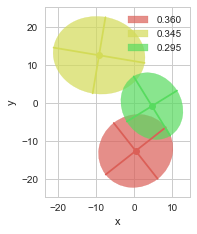

In [45]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [46]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLFd9LvidXGrt6u7by+297+1uSRgEQhIKhMHIRkKB
DZ5BIKMFL8SzbAy22ecZDRFYBI8niXAY8+zQyPbDjAGHBwGOAYMjPH4CBxekCEBiLh54IKG+urf3
paq69iW3M39knazMrMyqzKqs7qpWfhEdt27lyZMnszK//O0/QimlCBEiRIhTCu6kFxAiRIgQ/URI
ciFChDjVCEkuRIgQpxohyYUIEeJUIyS5ECFCnGqEJBciRIhTjZDkQoQIcaoRklyIECFONUKSCxEi
xKlGSHIhQoQ41QhJLkSIEKcaIcmFCBHiVCMkuRAhQpxqhCQXIkSIU42Q5EKECHGqEZJciBAhTjVC
kgsRIsSpRkhyIUKEONUISS5EiBCnGiHJhQgR4lQjJLkQIUKcaoQkFyJEiFONkORChAhxqhGSXIgQ
IU41QpILESLEqYZw0gsIcfKglEKSJCiKAp7nIYoiOI4DIeSklxYiRM8glFJ60osIcXLQNA2KokBV
VciybHxPCAHP8+A4LiS9EEONkORewFBVFYqiAGhKc3YiY7dHSHohhhUhyb0AQSk1pDdGVG4k57Qv
pRQcx4HnefA8D0EQQtILMbAIbXIvMGiaBlmWQSntipQIIcZ+qqpCkiRcunQJV199tUF2giCA5/mg
lx4iRFcISe4FAkopVFWFqqoAEJjUZZ5HURRQSlGv10EICUkvxEAgJLkXACRJQrlcRjwe77tK6UZ6
TL0NSS/EcSOMkzvlUFUV5XIZOzs7J2IzY+otswPW63WUy2WUSiVUq1XU63VDugwRoh8IJblTCrN6
2m9y8+O7Mjs67JIeW3MqlQolvRCBISS5UwgW+6Zp2rGqp73sTylFsVhEsVgEx3GhehsiMIQkd8rA
Yt/M3lOmLg4LzOptaNML0StCkjslsMe+uQX1tsMgxrm1U28Z6UUikYFce4jBQEhypwCdYt9OEwF0
Ij2We3uazjlEbwhJbsjBpDfAncw6qauqqmJ7e9sIM0kkEojH454kJDPpnJT3lh1fURTIsoxarQZJ
kqBpGsbHx0PSe4EjJLkhRVDOhUqlgs3NTaRSKSwtLaFWq6FSqSCbzYJSikQiYZDeMJAFW1+1WkWt
VkMsFkOtVgslvRcwQpIbQqiqiq2tLfA8j+np6Y7jnSQ5SikymQwODw+xsLCAVCoFWZYRiUQwOjoK
SilkWUa1WkWlUkE6nQYhpIX0Bhlm26Rd0gtJ74WDkOSGCPbULL/7MiiKgq2tLaiqirW1NUQikRYS
JIQgEokgEolgbGzMSOCvVqsolUo4ODgAz/NIJBLGnINOeoCzestseoz4QtI7XQhJbkhgV0/9hIWY
H9hyuYzNzU2Mj49jZmbG88NMCEE0GkU0GsX4+LhBepVKBQBw5coVCIJgSHmJRGIowjzY+WuaZjhw
zKQnCAIEQQhJb4gRktwQwFzQspvYN0IINE3DwcEBstmsoZ7ax/iBmfTS6TRWVlYgyzIqlQry+Tz2
9vYQiUQM0ovH48dKer1UWQGspCfLMorFImZmZkLSG0KEJDfAcKr7Zt/uBSy8pFwuY21trS9qJSEE
sVgMsVgMExMToJQaToyjoyPs7u4iGo1aSI/jBj91mhACRVFQqVQM9ZYQEkp6Q4SQ5AYUnbynXh+q
YrGI7e1tAMD58+eP7WEkhBhkNjk5CU3TDNLLZDKo1+uIxWKGahuLxY5lXb3CSdILSW+wEZLcACKI
2DdKKfb395HL5bCwsICNjY0TffA4jjM8s4BOEsxze3h4CEmSDAmzWq0iFov1tN4g4/bazRWS3uAj
JLkBQif11Ix2JCdJEra2tsBxHK666irwPD9wuascxyGZTCKZTALQ7Y6ZTAblchn7+/tQFMWQBBOJ
BKLR6FAQhRPpAbD0x+B5fijO5bQgJLkBQb1ex97enmePpxvJFQoFbG9vY2pqClNTU5Zx/cxK6JVE
eZ5HLBaDqqqYm5uDoiiGpLe7uwtVVS2e2+PMV+3lujmR3u7uLmZmZhCNRkPSOwaEJHfCYLFvsiwj
l8thdna2q3k0TcP+/j4KhQLOnTtnqIVA/3NX+zG/IAhIpVKGF5gZ/yuVCnK5HDRNs5DesMS2EUKM
QqHMkQHA0hQoJL1gEZLcCcLuXPBbfJKNr9fr2NzchCiKWFtbgyC0/qxs/LA+PIIgYHR0FKOjowBg
hKswRwZzdDC733HZ5Hqdzy7pSZIEAC39MYb1dxsEhCR3QrDXfeuW5PL5PHZ2dnD27FlMTEz09DAM
U905URQxNjZmZGMw0iuXy0in06CUQhRFI1bPifi9Iuhr4sWRwTJbWJtIey29kPS8IyS5Y4Zb3Te/
BEMpRaVSQbVaxfnz5xGPx9uOHyYC8wtzChrLxjg4ODCCeA8ODiAIgkXS8xuY3C9JzutxQ9LrHiHJ
HSPaxb75IaFarYaDgwNQSg3v6UljkAiUkYAgCJicnDRqzrFsjP39fSMFjdn12l3DfqqrfmEnvUKh
gFwuh8XFxZD0XBCS3DGhU+ybl7pslFLkcjns7e1hbGwMkiR5Jrh+SnKD/kC1y8bI5XLY3d011FpG
esOQjQFYNYNQ0nNGSHJ9Rjexb07jVFXF7u4uqtWqkSeayWR8ryWENRsDgCUbI5vNolarGSloiUQi
8IZA/XSKmCU9RVFC0kNIcn2FU2J9O7hJW9VqFZubm0gkElhbWwPHcYbTwiteSDc1oD/8XqWxdtkY
6XTaqErCVNxesjHYb3ac2RiAO+mJogiO4071/RGSXB/AYt9+8pOf4KqrrvLs2bOTHKUU2WwWBwcH
mJubw/j4eNdrOs2Oh6Bhz8bIZDKo1WpGJRdZlhGLxQxi9JONcZL2vRcq6YUkFzDMzgX2f68wExHr
uyBJElZXVxGNRl3HDgIGaS1Bgz38rAqzqqpGjN7e3p6RgsZIr102xnGGo3SCE+lls1nU63XMzMwY
zpthJ72Q5AJEULFv5r4LzGvmNtbv3P3AMD8AXmAnEp7nHbMxqtWqkY1hJj17NkaQ1ytIeyEhxHBg
sHvZXip+GEkvJLkAwNRTRVEssW8cx/kmlmw2i6OjI8zPz2NsbMx1XDekdZqlLTuOM7vDLRujWq22
NAQKOue239kYdkdGvV4HIaQlI2OQEZJcjwgq9o15YIvFotF3IUgM05t30OCXSNyyMZgjQ1VV7O3t
BdIQKGiS0zTN1WFjPo65562Z9BRFQSwWGyjiC0muB3iJffNCcuVyGVtbWyCEYHFx0RPBDZK6etrR
y3WzZ2PU63Vsb28jFou1NARipOcnBW1QHBmM9HZ2djA7O9uTkyxohCTXBbzGvnUiFkopDg8Pjb4L
+/v7ntcQNGmxAFnmXetm/0FC0A9/0HONj48bKWj1eh3VahWFQqGrbIwgA5d7mY8Q0lYSPCmEJOcT
rCaYl4eoHRHJsoytrS1QSo2+CyxVywuClOQURcHm5qZRAshsNPcSHnHaVeGgicTuhGDZGGfOnDFe
NsyJ0SkbI+i1aZrWczGDkOSGFJRSFItFw3DcS3BvqVTC1tYWzpw5g7Nnz/aUpN8rzC0KFxYWoKqq
EQjLwiPYAzZMddsGFZ1ejuZsDHsKmls2Ri+k5LS+XkgqlOSGFMy5sL6+jhe96EVd54uy6hhHR0dY
XFzEyMhI2/Gd5vYDp7VkMhkcHh5iYWEBo6OjkGUZPM9jZGTEWJu5WGU2mwUAC+kF+YAFiaBV+ePI
UHCCmfTsDYHS6bRhYmBhK/F4vKe19nquoSQ3hLDHvvlVEVkwsL3vQrvCll7n7jaEhAUay7Js8eQ6
zWkOjzB7Cs0

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUVPX6/98wMAoD5tcjKUclEeGoIAa5xPX9FZZpVqvC
k6Vi4bdSMSvL9EyYXy/VIdHjwVNmWquLHfHgtbU6dVpndfLyhVJPBYZ6KFBJwAvKRc0ZUAaG/fsD
97hns68ze2bP5XmtxVqyr89Q+z3P5/l89vMOYRiGAUEQhIaE6h0AQRCBBwkLQRCaQ8JCEITmkLAQ
BKE5JCwEQWgOCQtBEJoTpncABEEoo6urC6+99hqqq6thNBqRn5+P2267zbF///79ePfddxEWFoZp
06Zh+vTpsuesXr0a8fHxyM7OBgDk5+fjyJEjMJlMAIBNmzYhPDwcZrMZLS0tMJlMWLt2Lfr16ycd
LEMQhF/w1VdfMXl5eQzDMMyPP/7IPPvss459NpuNmTRpEnPlyhWmvb2defTRR5mmpibRc1paWpg5
c+Yw9957L1NcXOy4zsyZM5mWlhan+3788cfMhg0bGIZhmH/84x/MH//4R9lYaShEEH5CeXk57rrr
LgDA7bffjv/85z+OfTU1NYiLi8Mtt9wCo9GIO+64Az/88IPoOa2trVi4cCGysrIc1+jq6kJdXR1W
rlyJmTNnYs+ePT3um5mZicOHD8vG6pdDofLycr1DIAgHd9xxh+JjKyr2wW7vK7rfaDRi9OjRgvus
ViuioqIcvxsMBnR2diIsLAxWqxXR0dGOfSaTCVarVfScIUOGYMiQISgtLXXsa2trw5NPPomnn34a
drsds2fPRkpKitO1TSYTLBaL7Of0S2EBgJ1vHNDt3haLFdHRUfIH+jiB8Dn0/gwzVt6j6ni7vS8G
xa0W3X+ufpnovqioKLS2tjp+7+rqQlhYmOC+1tZWREdHS57DJyIiArNnz0ZERAQAYPz48aiqqnK6
RmtrK/r06SP7OWkoRBB+Qnp6uiPDqKioQFJSkmNfQkIC6urqcOXKFdhsNpSVlSEtLU3yHD61tbXI
zs6G3W5HR0cHjhw5guTkZKSnp6OkpAQAUFpaqihD89uMhSCCjcmTJ+PgwYOYOXMmGIbB6tWr8cUX
X6CtrQ0zZszA0qVLMWfOHDAMg2nTpmHAgAGC54iRkJCArKwsTJ8+HeHh4cjKykJiYiIGDx6MvLw8
ZGdnIzw8HIWFhbKxhjCM/73dXF5eTkMhDQiEz6H3Z5ix8h5VNZby8nLZoZCa6/kqXs9Y7HY7li9f
jtOnTyMkJASvv/46evXqhaVLlyIkJASJiYlYtWoVQkNplEYQ/orXheXAge5MY8eOHfjuu+/wl7/8
BQzDYNGiRcjIyMDKlSuxb98+TJ482duhEQShEV4XlkmTJuHuu+8GAJw/fx59+vTBoUOHMG7cOADd
8+QHDx6UFRaLxerpUH36/loRCJ8jED5DoKFL8TYsLAx5eXn4+uuvsWHDBhw8eBAhISEAlM+T6zmu
1ntcrxWB8DkC4TMEIroVMtauXYuvvvoKK1asQHt7u2O70nlygiB8F68Ly2effYb3338fQPeCnJCQ
EKSkpOC7774D0D1PPnbsWG+HRRCEhnh9KHTffffh1VdfxRNPPIHOzk4sW7YMCQkJWLFiBdavX49h
w4ZhypQp3g6LIAgN8bqwREZG4u233+6xfdu2bd4OJeA51Xytx7bh/SN0iIQINmjlbYAgJCIJo+N6
Hne83vFvux0wtF8jsSE0h4TFj+GKiZCICME9zmKxoLH2stN1SGQILSBh8UNcERQxuOfXHK93XJsE
hnAHEhY/gn3o3RUTMdjrsgJD4uIZWq6f1DsEj0PC4gZCdQ2lqHloPS0ofBJGx5G4eJBa3C26b6D3
wvAoJCwyCIkHW/R050HnFlGBnkKj5XDHFUhcCHcgYRGALyb8B9tisTi1AXQF/jX5QqOHmPAhcSFc
hYSFg55Zgi8IiRAkLoQrUNOTG3DrGL76kOsF/T0ItZCwcKAHSBp3itVEcEHCQiiCRJdQA9VYCMUk
jI7DqeP1VGvRCW9YrH7yySf48ssvAQATJkzACy+8AIZhkJmZiaFDhwLoNj5bsmSJZKwkLIRqqJCr
D3v37oXNZsPOnTtRUVGBNWvWYPPmzQCAjo4OFBQUYM+ePYiIiEB2djYmTpyII0eOCJ5z6dIlvPLK
K6itrcWcOXMAAGfOnMHnn3+O3bt3IzQ0FNnZ2Zg0aRIiIiKQnJyM9957T3GsNBQiVEFDIv3wtMXq
wIED8eGHH8JgMCAkJASdnZ3o1asXKisrcfHiReTk5GDevHn45ZdfZGOljCXAqbxyRXSf3W5HqovX
pazF+3jaYjU8PBz9+vUDwzD405/+hFGjRiE+Ph7Nzc3Izc3FAw88gLKyMpjNZnz66aeSsZKwaIzU
g8wlua+4f6/WcSQkCS8UP/HzOcdxauJh17YQ3sXTFqsA0N7ejmXLlsFkMmHVqlUAgJSUFBgMBgDA
2LFj0djYCIZhHH2qhfCqsHR0dGDZsmU4d+4cbDYbFixYgOHDh+vuKaTFNKqSB5ml5sQFp+O1EBm+
oMnFAACxg/sgOjraKR6lsVAh1/ukp6fjwIEDePDBByUtViMjI1FWVoY5c+YgJCRE9Bw+DMPgueee
Q0ZGBnJzcx3bN27ciL59+2LevHmoqqpCbGyspKgAXhaWzz//HH379sW6detw5coVTJ06FSNGjPAJ
TyF3agfsQ6nkYeYf54rICGVFSu8tFQ8bixqhoyGR9/C0xerevXvx/fffw2az4ZtvvgEALF68GLm5
uTCbzSgpKYHBYEBBQYFsrF61WG1tbQXDMIiKisLly5fx2GOPwWazobS0FCEhIdi7dy8OHjzoSMHE
0Npi9VSzuhcK+e8KVV654taDzVJz4oKi47S4FyD8zhMbg1JxYYdEeomL3vYfrlisXrj1r6L7Bzb+
D1msqsVkMgHoLkK9+OKLWLRoEdauXavaUwjQ1qTKbofi+968f/fxp202p9/d4dZYk6p7awH/WrfG
mtBw9iqOtbQg3miUPf/Wof+FhppmVF+04reRmoWlCn8zLKtrE69PUdsEF2loaMDzzz+PWbNm4eGH
H8a6desc+9R4Cmn5LWVov6bqbWXuN71Bo2xFD8Te0o4e2V13Ufo3ib49GjXH63Gx3fuZi94Ziyv8
2vXfeofgcbxaJW1ubsYzzzwDs9mMxx57DAAwatQoXT2F1A6DgoWEpIGKZ7iAmy9vnmq+Ru8UEd4V
lvfeew9Xr17Fpk2bkJOTg5ycHCxatAjvvPMOZsyYgY6ODr/yFNKqthJIsCJN4hLceHUotHz5cixf
vrzHdvIU8k0Skgai8sQF1dPh1MOFCOol/XoOg45ZmnW5r7egzCW4oZW3blJz4oLi4RBXTBLjb8Wx
0409jkmN7q9ZbFqhdm0LC63QDV6CVli0+CZN7ttXcYGTFZXE+Fsd27j/BoCTpxsVZzLeEqCEpIGK
19cInk8rdIOSoBUWwPtv6vKFRO1+LvxsxxczHS5UbwkuglJYAmGKmStC/ExHSmS4x9ntdhgs7YpE
ydXhEEDF3GAkKIUl0JASGanj2QVybPYjJjDuDocAEpdgI+iEJRCyFSnUDKe457CC5MkhFYlL8BDU
081a4e63uS8gJ0hqV+KKXoemoYMCEhY3UVN3OCkwvexryA2jtBQXInAJuqGQXqRG91e9KO5oW5Pk
/jGRMe6E1AN2SCSGFrUWx7VoGjqgIWHxUVhRGTFYWDyqzjY5jtFaYORqLe7MEPGhektgQkMhjVDy
TZ4a3V/RcOhoWxNGDI4RFRUATvuPtjXJZjdKUVJrAbQdEgVbvaX6aoPoT6BAGYsGqFmBqzWsuGid
wUhlLQ5xUdl

## Goodness-of-fit Statistics

In [47]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.923  0.016      0.045  5.472743e-09      0.054       0.340

# 5. GMM by Optimization

In [48]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [49]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -20.029323284876728
     jac: array([ -2.86987782e-01,   2.38418579e-07,   0.00000000e+00,
         2.38418579e-07,   0.00000000e+00,   0.00000000e+00,
        -2.86995649e-01,   0.00000000e+00,   2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,  -7.15255737e-07,
        -2.87001610e-01,   0.00000000e+00,   2.38418579e-07,
         2.38418579e-07,   2.38418579e-07,  -4.76837158e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2178
     nit: 108
    njev: 108
  status: 0
 success: True
       x: array([  0.05342547,  -5.69070498,   2.10425092,   2.72137639,
         7.06487375,  -0.26410707,   0.70844485,  -2.48220528,
         3.76490001,  12.77481849,  15.43145491,  -0.34250806,
         0.23812967,   4.86700832, -10.07050721,   7.0106384 ,
         8.55207504,   0.55346969])

## 5.1 GMM Result

In [50]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.708  -2.482    3.765  12.775  15.431  -0.343
2  0.238   4.867  -10.071   7.011   8.552   0.553
3  0.053  -5.691    2.104   2.721   7.065  -0.264

GMM Plot Result
0.708444854806 [[-2.48220528  3.76490001]] [ 11.11054677  16.6697792 ] -149.512966678
0.238129673867 [[  4.86700832 -10.07050721]] [ 5.08514901  9.81979113] 144.93640276
0.0534254713272 [[-5.69070498  2.10425092]] [ 2.60916156  7.10708144] -173.281474839


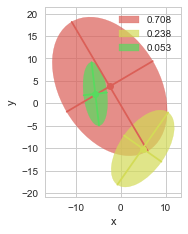

In [51]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [52]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.972  0.030      0.052  2.001591e-09      0.033       0.206

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm0LGddNvq8NfW45/GcffZ8kkiASEIkIPeDwCcLBe41
GEhMXOiS8AkIwSFezEIlyMrHpIurF1G8l8sn4kKIei8qKssbcBGF+6HgF5VApr3Pnufd81zDe/+o
fqurqqu6q7qr9+7eqWets8453VVvv91d9fRveH6/H6GUUoQIESLEBQV33hsIESJEiF4iJLkQIUJc
aIQkFyJEiAuNkORChAhxoRGSXIgQIS40QpILESLEhUZIciFChLjQCEkuRIgQFxohyYUIEeJCIyS5
ECFCXGiEJBciRIgLjZDkQoQIcaERklyIECEuNEKSCxEixIVGSHIhQoS40AhJLkSIEBcaIcmFCBHi
QiMkuRAhQlxohCQXIkSIC42Q5EKECHGhEZJciBAhLjRCkgsRIsSFRkhyIUKEuNAISS5EiBAXGiHJ
hQgR4kJDOO8NhDh/UEpRq9WgKAp4nocoiuA4DoSQ895aiBBdg1BK6XlvIsT5QdM0KIoCVVUhy7Lx
OCEEPM+D47iQ9EIMNEKSew5DVVUoigKgYc3ZiYxdHiHphRhUhCT3HASl1LDeGFG5kZzTuZRScBwH
nufB8zwEQQhJL0TfIozJPcegaRpkWQaltCNSIoQY56mqilqthvX1dVx33XUG2QmCAJ7ng956iBAd
ISS55wgopVBVFaqqAkBgVpd5HUVRQClFtVoFISQkvRB9gZDkngOo1WooFouIxWI9dyndSI+5tyHp
hThrhDq5Cw5VVVEsFrG3t3cuMTPm3rI4YLVaRbFYRKFQQLlcRrVaNazLECF6gdCSu6Awu6e9Jjc/
uStzosNu6bE9Dw0NhZZeiMAQktwFBNO+aZp2pu5pN+dTSpHP55HP58FxXOjehggMIcldMDDtmzl7
ytzFQYHZvQ1jeiG6RUhyFwR27ZubqLcV+lHn1sq9ZaQnSVJf7j1EfyAkuQuAdtq3i0QA7UiP1d5e
pPccojuEJDfgYNYb4E5mvXRXzaRzXtlb9vqKokCWZVQqFdRqNWiahtHR0ZD0nuMISW5AcZbJhUEC
+yzK5TIqlQqi0SgqlUpo6T2HEZLcAEJVVezs7IDneUxNTbU9ftASD0HBHJu0W3oh6T13EJLcAMFe
muX33BDO7i2L6THiC0nvYiEkuQGB3T31Y52FN6w72GejaZqRwDGTniAIEAQh/AwHGCHJDQDMDS07
0b55Obabm5it309E0E2XFcBKerIsI5/PY2ZmJiS9AURIcn0Mp75v9udD9BaEECiKglKpZLi3hJDQ
0hsghCTXp2iXPfVzUz1XEw+9gJOlF5JefyMkuT7EeWvfzgtBvp8g3edWa4Wk1/8ISa6P0M49NSPo
mFyxWEQmk0E0GkU8Hj+32tBBJwMn0gNgmY/B8/zAv89BQkhyfYJqtYqDgwPMzMx4ugE6seScLBJK
KY6Pj5FKpTA8PIxsNovDw0OIooh4PI54PI5YLAaOa9168KJZlWZ0YxU6kd7+/j5mZmYQiURC0jsD
hCR3zmDaN1mWkclkMDs7G/hruN1AiqJge3sblFKsrq4aREUpRaVSQalUQiqVMioHYrEY4vE4otGo
hfTCG9Q7CCFGo1CWyABgGQoUkl6wCEnuHGFPLvhtPtnJ8ezmKRaL2N7extjYGKanp0EIQa1WM46N
xWKIxWKYmJiApmkol8solUo4Pj5GrVYzCC8ej/elFXdWMblu17Nbeuw7sM/HCEmvc4Qkd06w933r
NckxmN3Tubk5DA0NtV2T4zgkEgkkEglj74z0Dg4OQCnF/v4+EokE4vH4hWt9FDSJe0lksMoWNibS
3kvvIn2+vUZIcmcMt75vZ2HJybKMvb09wz0VRdH3/gHdtUomk0gmkwCAZ555BslkEtVqFZlMBpqm
GbG8eDx+IcqkemXJeX3dkPQ6R0hyZ4hW2rdeS0Iopbh27ZrFPQ0KhBAkk0mMjo4CAGRZRqlUQqlU
wunpKQghhmsbj8chCL2/7AbFXfULO+nlcjlkMhlcuXIlJD0XhCR3RminffPbl80rKTL3lFKK2dlZ
g4iChH2/oihiZGQEIyMjoJQapFcoFHB0dARBECwxvbCVeecwewahpeeMkOR6jE60b0GRnDl7yuJq
Zw1CCCRJgiRJGB0dNTr5lkqlJrkK0J9SlH6y5NqtZbb0FEUJSQ8hyfUUToX1rRCkwLdQKGBnZ8dw
T5966ilvm+4xCCGIRqOIRqMYHx+3yFXy+TxqtRq2trYMK88uV/EKRuz9BvadnWU1BuBOeqIoguO4
C016Icn1AEz79sQTT+Dq1aueY1BBxOXcsqf9WgZmlquIoohCoYCRkRGUy2WcnJygWq0arm0sFkM0
Gj3zG/KixPeeq6QXklzAMCcX2P+9oltLzi7u7TR72gmCIlBCiKtc5fDwEIqiWOJ5gyZXOUs5Sjs4
kV4qlUK1WsXMzIwhTh500gtJLkCcpfbNfqzdPT3L7G0vbwC7XEVRFIP0mFzFTHq9kKsEbX0FuVaQ
Mz4IIUYCg13L9lbxg0h6IckFAOaeKopi0b5xHNdzkmsl7nXa56BDEAQMDQ0Z79NNrqIoCqLR6Dnv
thn9nMSwr2e+ltn1Xa1WQQhpqsjoZ4Qk1yWC1L75PZ5Sio2NDU/u6SD98vqBm1wlnU6jXC4jn89b
NHqd3JAXJSbnBZqmuSZszK9jnnlrJj3249JPxBeSXBfwon3rlfVULpdRrVYxPDzsSdzbr4mHIGGW
q9RqNQiCgHg8jnK5jFwuZ5GrsGSHl5uxX/vcnfd6TqS3t7fXMz1mpwhJrgN41b71wpJj7unp6SkE
QcDMzIzn9XuJfiNQJiFhcpWxsTGLXCWdTmN/fx+RSMSTXCVISy5IBC2V6WY9QkhLS/C8EJKcT7Ce
YF5+8YImOXP2dHFxEdvb24Gt3Q0GxRU2y1VYdxVGekyuwpqGMtJjn1uQN27QlleQe9M0rauyu37U
J4Yk5xGUUuTzeUOyELS4t93x9uwpI9oQnYPjOIPQAKtc5ejoCLIsIxaLQdM0RCKRQFzDQXBXuyGp
0JIbULDkwtraGm644QbPQdUgSM6cPb1y5YohpfB7YT8XYnJmdPJe3eQqp6enyOfzyOVyliRGJ3KV
QSC5btYLLbkBhF375pe0uhEDtxL3dkJa7Y6/aETY7c3P5CrlchmiKCKZTBqWXiqVAoCmllLt0G+k
ZEe3uruQ5AYITPtmzp76JYFudHJBi3t7HTe7SORoByMSURQhiiKGh4ctcpVisYiTkxOL+xuLxRxj
W/1U8eC2Xrfuaj/JR4CQ5Bzhpn3r1jLzcrymaTg6OmpyT7vFICQeBokonbqr1Go1lEolQ67CJCyM
9NjN38+WXLfrhTG5AQBzT4Hmi7GXFQxAI/4mCIInce8gkYJX9KPo1msmPRKJIBKJNMlVMpmMIVcR
BMGY5xAEGfSTuxp0h5WgEJJcHV60b72sYCgUCigUCkgmk1hYWDhzeQqzPiRJsgTWQ3QGs1wFgCFX
yWQyqNVqWFtbc5Sr+EU/uav9aMUBIckB8K5966W4N5VKIZFIYGhoyNdF6+cid9oLpRSHh4fIZrOG
NKVYLBoWpZO79VxDEETC4nWsvnlmZgalUgnlctmQq5hJLxKJeHrNfnJX+zHpAIQk17Y0y4ygY3Ky
LGNnZwcAsLq6arQp97o24K9dutvrE0KMuauU0qYOvmZ3y0x6/eaWDALY98txnEWuoqqq0Whgf38f
qqp6kqv0k7saZEeUIPGcJblarYZKpeKrH1mQMTmn7GkvM6b2tZ3mrjKpDDve3MGXuVvMymNCWTZ3
1Q/5nwX6uaj

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUVPX6/98wMAoD5tcjKUclEeGoIAa5xPX9FZZpVqvC
k6Vi4bdSMSvL9EyYXy/VIdHjwVNmWquLHfHgtbU6dVpndfLyhVJPBYZ6KFBJwAvKRc0ZUAaG/fsD
97hns68ze2bP5XmtxVqyr89Q+z3P5/l89vMOYRiGAUEQhIaE6h0AQRCBBwkLQRCaQ8JCEITmkLAQ
BKE5JCwEQWgOCQtBEJoTpncABEEoo6urC6+99hqqq6thNBqRn5+P2267zbF///79ePfddxEWFoZp
06Zh+vTpsuesXr0a8fHxyM7OBgDk5+fjyJEjMJlMAIBNmzYhPDwcZrMZLS0tMJlMWLt2Lfr16ycd
LEMQhF/w1VdfMXl5eQzDMMyPP/7IPPvss459NpuNmTRpEnPlyhWmvb2defTRR5mmpibRc1paWpg5
c+Yw9957L1NcXOy4zsyZM5mWlhan+3788cfMhg0bGIZhmH/84x/MH//4R9lYaShEEH5CeXk57rrr
LgDA7bffjv/85z+OfTU1NYiLi8Mtt9wCo9GIO+64Az/88IPoOa2trVi4cCGysrIc1+jq6kJdXR1W
rlyJmTNnYs+ePT3um5mZicOHD8vG6pdDofLycr1DIAgHd9xxh+JjKyr2wW7vK7rfaDRi9OjRgvus
ViuioqIcvxsMBnR2diIsLAxWqxXR0dGOfSaTCVarVfScIUOGYMiQISgtLXXsa2trw5NPPomnn34a
drsds2fPRkpKitO1TSYTLBaL7Of0S2EBgJ1vHNDt3haLFdHRUfIH+jiB8Dn0/gwzVt6j6ni7vS8G
xa0W3X+ufpnovqioKLS2tjp+7+rqQlhYmOC+1tZWREdHS57DJyIiArNnz0ZERAQAYPz48aiqqnK6
RmtrK/r06SP7OWkoRBB+Qnp6uiPDqKioQFJSkmNfQkIC6urqcOXKFdhsNpSVlSEtLU3yHD61tbXI
zs6G3W5HR0cHjhw5guTkZKSnp6OkpAQAUFpaqihD89uMhSCCjcmTJ+PgwYOYOXMmGIbB6tWr8cUX
X6CtrQ0zZszA0qVLMWfOHDAMg2nTpmHAgAGC54iRkJCArKwsTJ8+HeHh4cjKykJiYiIGDx6MvLw8
ZGdnIzw8HIWFhbKxhjCM/73dXF5eTkMhDQiEz6H3Z5ix8h5VNZby8nLZoZCa6/kqXs9Y7HY7li9f
jtOnTyMkJASvv/46evXqhaVLlyIkJASJiYlYtWoVQkNplEYQ/orXheXAge5MY8eOHfjuu+/wl7/8
BQzDYNGiRcjIyMDKlSuxb98+TJ482duhEQShEV4XlkmTJuHuu+8GAJw/fx59+vTBoUOHMG7cOADd
8+QHDx6UFRaLxerpUH36/loRCJ8jED5DoKFL8TYsLAx5eXn4+uuvsWHDBhw8eBAhISEAlM+T6zmu
1ntcrxWB8DkC4TMEIroVMtauXYuvvvoKK1asQHt7u2O70nlygiB8F68Ly2effYb3338fQPeCnJCQ
EKSkpOC7774D0D1PPnbsWG+HRRCEhnh9KHTffffh1VdfxRNPPIHOzk4sW7YMCQkJWLFiBdavX49h
w4ZhypQp3g6LIAgN8bqwREZG4u233+6xfdu2bd4OJeA51Xytx7bh/SN0iIQINmjlbYAgJCIJo+N6
Hne83vFvux0wtF8jsSE0h4TFj+GKiZCICME9zmKxoLH2stN1SGQILSBh8UNcERQxuOfXHK93XJsE
hnAHEhY/gn3o3RUTMdjrsgJD4uIZWq6f1DsEj0PC4gZCdQ2lqHloPS0ofBJGx5G4eJBa3C26b6D3
wvAoJCwyCIkHW/R050HnFlGBnkKj5XDHFUhcCHcgYRGALyb8B9tisTi1AXQF/jX5QqOHmPAhcSFc
hYSFg55Zgi8IiRAkLoQrUNOTG3DrGL76kOsF/T0ItZCwcKAHSBp3itVEcEHCQiiCRJdQA9VYCMUk
jI7DqeP1VGvRCW9YrH7yySf48ssvAQATJkzACy+8AIZhkJmZiaFDhwLoNj5bsmSJZKwkLIRqqJCr
D3v37oXNZsPOnTtRUVGBNWvWYPPmzQCAjo4OFBQUYM+ePYiIiEB2djYmTpyII0eOCJ5z6dIlvPLK
K6itrcWcOXMAAGfOnMHnn3+O3bt3IzQ0FNnZ2Zg0aRIiIiKQnJyM9957T3GsNBQiVEFDIv3wtMXq
wIED8eGHH8JgMCAkJASdnZ3o1asXKisrcfHiReTk5GDevHn45ZdfZGOljCXAqbxyRXSf3W5HqovX
pazF+3jaYjU8PBz9+vUDwzD405/+hFGjRiE+Ph7Nzc3Izc3FAw88gLKyMpjNZnz66aeSsZKwaIzU
g8wlua+4f6/WcSQkCS8UP/HzOcdxauJh17YQ3sXTFqsA0N7ejmXLlsFkMmHVqlUAgJSUFBgMBgDA
2LFj0djYCIZhHH2qhfCqsHR0dGDZsmU4d+4cbDYbFixYgOHDh+vuKaTFNKqSB5ml5sQFp+O1EBm+
oMnFAACxg/sgOjraKR6lsVAh1/ukp6fjwIEDePDBByUtViMjI1FWVoY5c+YgJCRE9Bw+DMPgueee
Q0ZGBnJzcx3bN27ciL59+2LevHmoqqpCbGyspKgAXhaWzz//HH379sW6detw5coVTJ06FSNGjPAJ
TyF3agfsQ6nkYeYf54rICGVFSu8tFQ8bixqhoyGR9/C0xerevXvx/fffw2az4ZtvvgEALF68GLm5
uTCbzSgpKYHBYEBBQYFsrF61WG1tbQXDMIiKisLly5fx2GOPwWazobS0FCEhIdi7dy8OHjzoSMHE
0Npi9VSzuhcK+e8KVV654taDzVJz4oKi47S4FyD8zhMbg1JxYYdEeomL3vYfrlisXrj1r6L7Bzb+
D1msqsVkMgHoLkK9+OKLWLRoEdauXavaUwjQ1qTKbofi+968f/fxp202p9/d4dZYk6p7awH/WrfG
mtBw9iqOtbQg3miUPf/Wof+FhppmVF+04reRmoWlCn8zLKtrE69PUdsEF2loaMDzzz+PWbNm4eGH
H8a6desc+9R4Cmn5LWVov6bqbWXuN71Bo2xFD8Te0o4e2V13Ufo3ib49GjXH63Gx3fuZi94Ziyv8
2vXfeofgcbxaJW1ubsYzzzwDs9mMxx57DAAwatQoXT2F1A6DgoWEpIGKZ7iAmy9vnmq+Ru8UEd4V
lvfeew9Xr17Fpk2bkJOTg5ycHCxatAjvvPMOZsyYgY6ODr/yFNKqthJIsCJN4hLceHUotHz5cixf
vrzHdvIU8k0Skgai8sQF1dPh1MOFCOol/XoOg45ZmnW5r7egzCW4oZW3blJz4oLi4RBXTBLjb8Wx
0409jkmN7q9ZbFqhdm0LC63QDV6CVli0+CZN7ttXcYGTFZXE+Fsd27j/BoCTpxsVZzLeEqCEpIGK
19cInk8rdIOSoBUWwPtv6vKFRO1+LvxsxxczHS5UbwkuglJYAmGKmStC/ExHSmS4x9ntdhgs7YpE
ydXhEEDF3GAkKIUl0JASGanj2QVybPYjJjDuDocAEpdgI+iEJRCyFSnUDKe457CC5MkhFYlL8BDU
081a4e63uS8gJ0hqV+KKXoemoYMCEhY3UVN3OCkwvexryA2jtBQXInAJuqGQXqRG91e9KO5oW5Pk
/jGRMe6E1AN2SCSGFrUWx7VoGjqgIWHxUVhRGTFYWDyqzjY5jtFaYORqLe7MEPGhektgQkMhjVDy
TZ4a3V/RcOhoWxNGDI4RFRUATvuPtjXJZjdKUVJrAbQdEgVbvaX6aoPoT6BAGYsGqFmBqzWsuGid
wUhlLQ5xUdl

In [54]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log


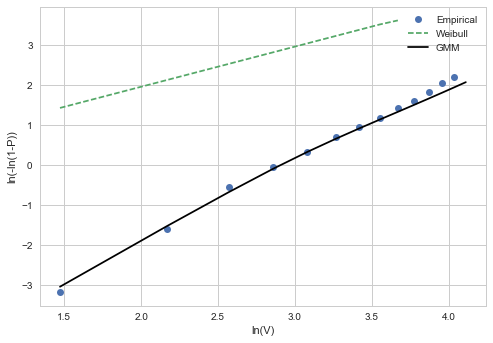

In [55]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


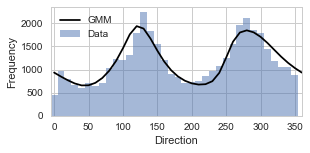

In [56]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


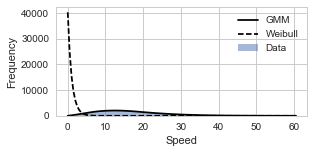

In [57]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   

title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [58]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.89405339802


## 5.3 Sectoral Comaprison

In [59]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: RuntimeWarning: divide by zero encountered in log


5.0 (-5.0 - 15.0) degree


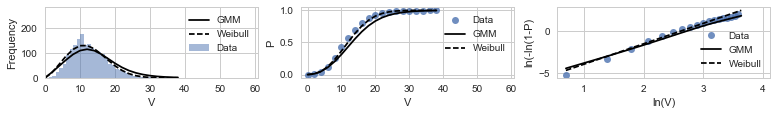

data size: 1875 weight 0.04425509818731118
GMM Weibull
R square 0.876382589507 0.942894784558
max diff: 0.14153432135 0.0693338661923 speed value: 12.0 y gmm 0.435532345317
 
25.0 (15.0 - 35.0) degree


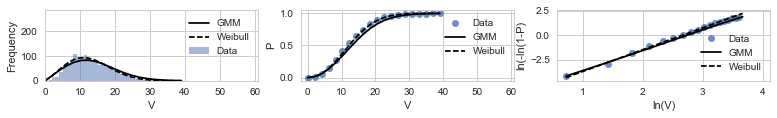

data size: 1462 weight 0.034507175226586105
GMM Weibull
R square 0.926350829307 0.959822033028
max diff: 0.0848066376273 0.033475559897 speed value: 12.3157894737 y gmm 0.457601023111
 
45.0 (35.0 - 55.0) degree


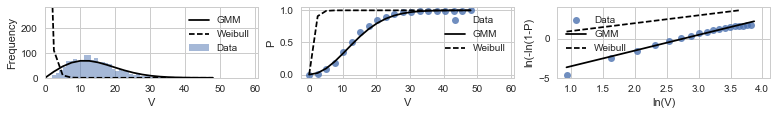

data size: 1291 weight 0.030471110271903322
GMM Weibull
R square 0.92573074792 -17.7652826909
max diff: 0.0680404856322 0.908987177073 speed value: 15.1578947368 y gmm 0.596560598798
 
65.0 (55.0 - 75.0) degree


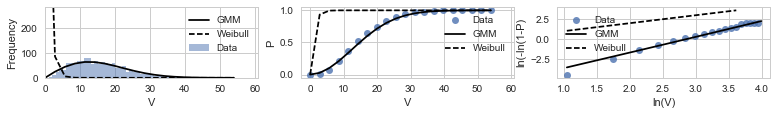

data size: 1355 weight 0.03198168429003021
GMM Weibull
R square 0.948802812738 -22.5054018852
max diff: 0.0529323639475 0.922177615461 speed value: 17.0526315789 y gmm 0.601680182178
 
85.0 (75.0 - 95.0) degree


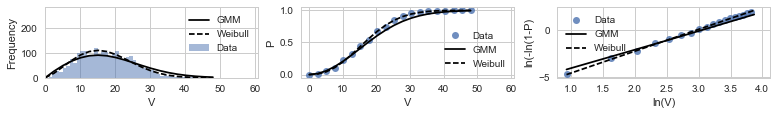

data size: 2250 weight 0.05310611782477341
GMM Weibull
R square 0.901852394061 0.951305821669
max diff: 0.0893533380738 0.0254309211024 speed value: 25.2631578947 y gmm 0.76797999526
 
105.0 (95.0 - 115.0) degree


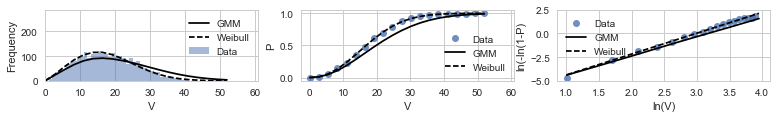

data size: 2522 weight 0.05952605740181269
GMM Weibull
R square 0.873890083473 0.970666174912
max diff: 0.145290038178 0.0228541240124 speed value: 27.3684210526 y gmm 0.732981175145
 
125.0 (115.0 - 135.0) degree


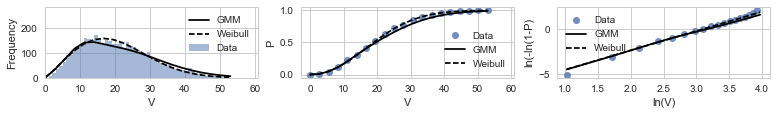

data size: 4025 weight 0.09500094410876132
GMM Weibull
R square 0.954818569667 0.97231844325
max diff: 0.0624971707107 0.0213331975721 speed value: 25.1052631579 y gmm 0.662223326184
 
145.0 (135.0 - 155.0) degree


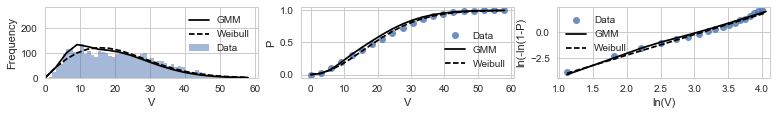

data size: 3373 weight 0.07961197129909366
GMM Weibull
R square 0.870109875256 0.865657745265
max diff: 0.0693230248702 0.044497936077 speed value: 24.4210526316 y gmm 0.710591924959
 
165.0 (155.0 - 175.0) degree


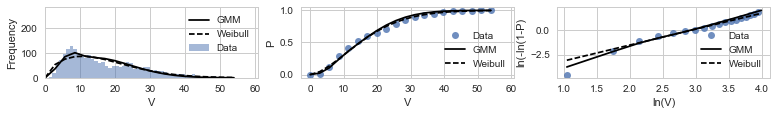

data size: 2120 weight 0.05003776435045317
GMM Weibull
R square 0.877805859247 0.820035773918
max diff: 0.0553367267709 0.0543171950836 speed value: 22.7368421053 y gmm 0.76995936828
 
185.0 (175.0 - 195.0) degree


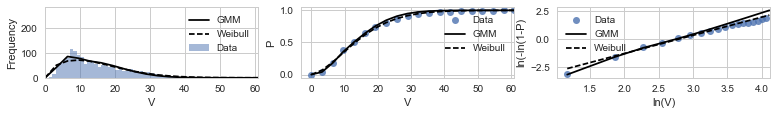

data size: 1550 weight 0.03658421450151057
GMM Weibull
R square 0.931209582579 0.865670943928
max diff: 0.0451973032779 0.0428559590347 speed value: 25.6842105263 y gmm 0.90906827102
 
205.0 (195.0 - 215.0) degree


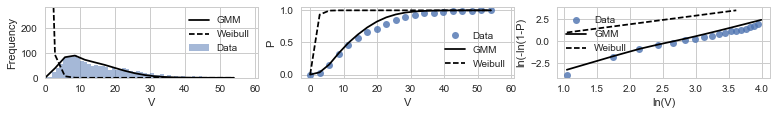

data size: 1465 weight 0.0345779833836858
GMM Weibull
R square 0.913522436034 -26.0278829866
max diff: 0.108785978712 0.912769910462 speed value: 19.8947368421 y gmm 0.824144340487
 
225.0 (215.0 - 235.0) degree


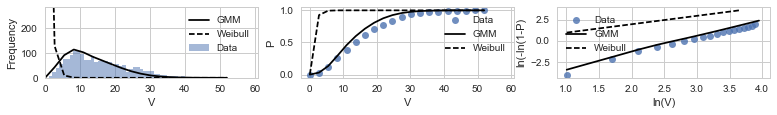

data size: 1830 weight 0.04319297583081571
GMM Weibull
R square 0.869842677037 -27.8147225842
max diff: 0.109537335062 0.908722497732 speed value: 21.8947368421 y gmm 0.876750449816
 
245.0 (235.0 - 255.0) degree


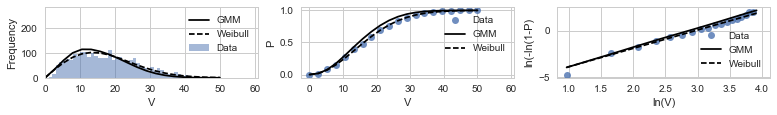

data size: 2339 weight 0.05520675981873112
GMM Weibull
R square 0.836111149002 0.925912269487
max diff: 0.0941599510874 0.0289755530368 speed value: 23.6842105263 y gmm 0.843198001536
 
265.0 (255.0 - 275.0) degree


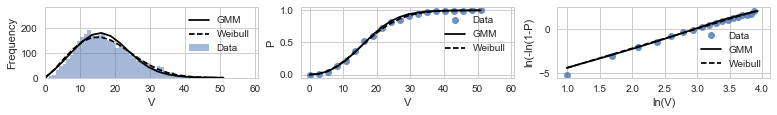

data size: 3507 weight 0.08277473564954682
GMM Weibull
R square 0.960258310019 0.969499532055
max diff: 0.0413906781541 0.042420267269 speed value: 26.8421052632 y gmm 0.897678103304
 
285.0 (275.0 - 295.0) degree


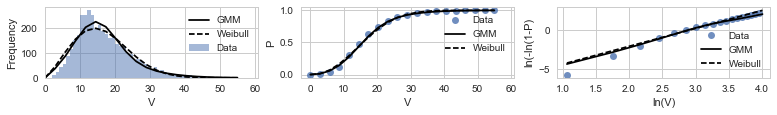

data size: 3964 weight 0.09356117824773413
GMM Weibull
R square 0.947952715671 0.924550313074
max diff: 0.0449600353793 0.0441927877644 speed value: 14.4736842105 y gmm 0.435867411644
 
305.0 (295.0 - 315.0) degree


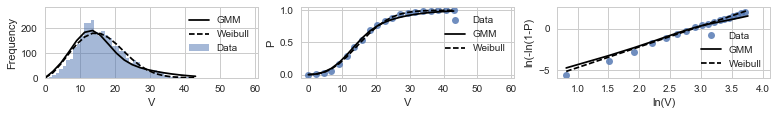

data size: 3238 weight 0.07642560422960724
GMM Weibull
R square 0.923224051053 0.938159837142
max diff: 0.0454506811494 0.0498295268999 speed value: 27.1578947368 y gmm 0.892782796306
 
325.0 (315.0 - 335.0) degree


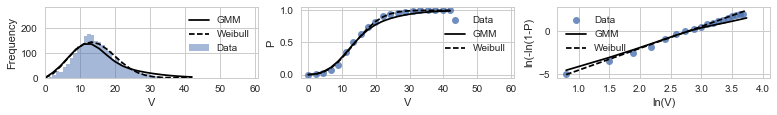

data size: 2249 weight 0.053082515105740184
GMM Weibull
R square 0.918800361866 0.955778221257
max diff: 0.07381390575 0.0429400119903 speed value: 22.1052631579 y gmm 0.832366618928
 
345.0 (335.0 - 355.0) degree


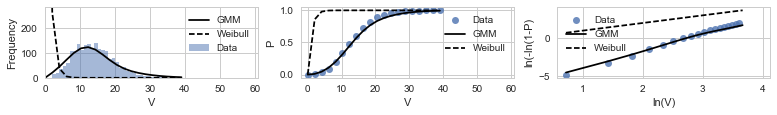

data size: 1953 weight 0.04609611027190332
GMM Weibull
R square 0.942874192328 -18.4077595737
max diff: 0.053990580342 0.944624716878 speed value: 20.5263157895 y gmm 0.835410341317
 
Wall time: 1min 8s


In [60]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9134740245162437 -3.453564486209869


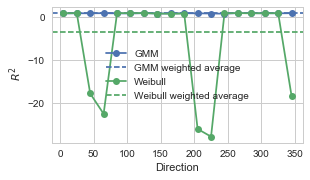

In [61]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print(gmm_mean, weibull_mean)

0.07343291160137444 0.20366913867868627


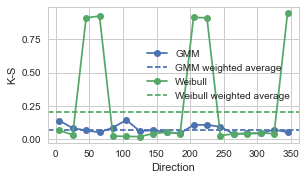

In [62]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print(gmm_mean, weibull_mean)

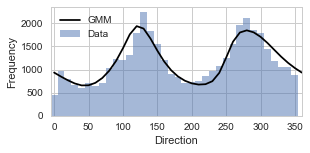

In [63]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [64]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [65]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution
0.165724309599 21.0 0.542840321646


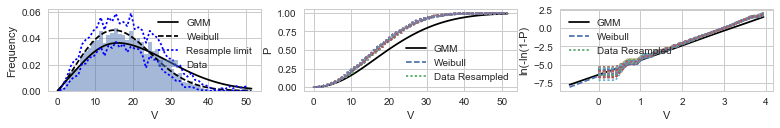

In [66]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [67]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4G+W1/78zo9XyvtuxnQQnIYSQUkLYoTRAgQBtaUhC
2HtzWXrbe8vtD24JXR7K5QmFdIHeQp5yKaVQ2lJSSqEUaEMS6E2BJoFAQ0J2O7YTLbYlWfusvz/k
dzySJVnbyGPr/TwPpVjSaCSN3q/Oec/5HkZRFAUUCoVCoVAywk72CVAoFAqFMhWggkmhUCgUShZQ
waRQKBQKJQuoYFIoFAqFkgVUMCkUCoVCyQIqmBQKhUKhZAEVTAqFQqFQsoAKJoVCoVAoWUAFk0Kh
UCiULKCCSaFQKBRKFlDBpFAoFAolC6hgUigUCoWSBVQwKRQKhULJAiqYFAqFQqFkARVMCoVCoVCy
gAomhUKhUEpGX18f/uM//gMrV67ETTfdhNtuuw0HDhzA//zP/+Ckk06Cy+VS7zs0NISTTz4ZL774
Ivr7+3HiiSfiiSeeSDjeHXfcgRtvvLEk504Fk0KhUCglIRKJ4Ctf+Qq+/OUv43e/+x2eeeYZfO1r
X8P9998PAJg1axZee+019f5//vOf0dbWpv53V1cX3njjDfW/vV4vent7S3b+ppI9E4VCoVAMw913
340XXnihqMdcsWIF1q9fn/b2LVu24KyzzsKnP/1p9W+LFi3CM888g5/+9KdYtmwZXn/9ddxyyy3q
/T/72c+q962rq0NtbS0OHTqE7u5uvPbaa7jsssuwY8eOor6OdNAIk0KhUCglob+/H11dXep/f+Ur
X8GNN96Iyy67DE6nE42NjbDb7ejr60Nvby9aW1thtVoTjnHFFVfg1VdfBQC8+eabuPjii0t2/jTC
pFAolDJk/fr1GaNBPWhtbcXu3bvV/96wYQMAYOXKlZAkCcCYIIqiiKuuugrbtm1LOMbFF1+M66+/
Hl/60pfQ1NQEm81WsvOnESaFQqFQSsJFF12Ed955B7t27VL/1tvbC6fTCYZhAACXXnop3nzzTezY
sQNnnnnmuGM4HA7Mnj0b69evx5VXXlmycweoYFIoFAqlRDgcDmzYsAG//OUvccMNN+Daa6/Fvffe
i7Vr16K9vR0AUFVVhdbWVixYsAAsm1qirrrqKuzcuRNnn312KU8fjKIoSkmfkUKhUCiUKQiNMCkU
CoVCyQIqmBQKhUKhZAGtkqWUJbIsQxRF8DwPjuPAsiw4jgPHcWrxAYVCoWihgkkpK2RZhiRJkGUZ
iqKo/9Zu5bMsC5ZlwTAMFVIKhaJCBZNSFmiFMhVaMVQURe0JI0LKMAwYhoEsy4hEIqitraVCSqGU
GVQwKdMaknrNtxg8WUhjsRg8Hg/sdrt6O4lEyb9NJpP63xQKZfpAi34o0xJJksDzPHiez1ssU8Ew
DBRFUYUSGItIRVFELBZDKBRCIBBAMBhEOBxGJBJBLBaDJElFPRcKZapx880346OPPgIA8DyPxYsX
48knn1Rvv/HGG7F3795xj3v77bfx/PPPo7+/HytXrsz6+c4991z1uIcOHSrw7KlgUqYZRCgFQVCF
rZQQISXCOpGQ8jxPhZRSNpx77rmqUfrOnTtx3nnn4a233gIAxGIxDAwMYP78+eMed8EFF2DVqlUl
PddUUMGkTAskSUIwGMSePXtyEsp8BDUfcUsnpNFoFMFgUBXSSCSCaDRKhZRSEmbNGv/P2rX53z4R
55xzjiqYb731FlasWIFAIIBAIIAPPvgAZ5xxBrZv347Vq1fjhhtuwNq1ayEIAl588UX84Ac/AAAM
Dw/jjjvuwIoVK/DYY48BAO655x68/fbbAOLR6D333JPvW5IRuodJmdJIkpRQzJOuqKdYFDtiTU7t
iqKo/n8i/KTtRVu1S/dIKVORBQsW4PDhw1AUBdu3b8c3vvENnH322fj73/+Offv24bzzzsN3vvMd
/PrXv0ZDQwMeeeQR/OEPf4DJNCZV4XAY69evR0VFBa6//npcdNFFJTt/KpiUKQdpByFCmRy9TQe0
QirLsvpDQFu1S9pfSGtMRUVFwuMolIno6dH39mRYlsX8+fPx9ttvo6mpCRaLBRdccAG2bt2KTz75
BNdffz2+853v4M477wQARKNRnHPOOZg5c6Z6jPnz56OqqgoAcMopp+DIkSMJz6HnGkAFkzJlSCeU
hFII5mSLsvb1EiEdGRlBKBRCa2trgpCS6JREpBSKETj33HPxs5/9DFdccQUAYPHixXj88ccBxAdE
t7a24vHHH0dVVRXefPNNVFRU4Pjx4+rjDx06hFAoBKvVio8++girVq3CO++8A4/HAwDYs2ePbudO
BZNieIhQkvaQdFFUrmI2XSIxbdQJJEakPM+rtyULqclkmjbvAWXqcM455+Db3/42Hn74YQCAxWJB
VVUVTjrpJLAsi29961u47bbboCgKHA4HHn744QTBrKmpwX/+539ieHgYy5Ytw5w5c7BixQrce++9
eOWVVzArm83UPKHTSiiGhRTHkOKXiRZ3WZaxZ88eLFy4MOvnIIKSLYIg4OjRo+ju7s7pcXri9/sR
iUTQ2tqa9WNSpXYZhoHJZKJmDBRKGmiESTEcqYQymwVcWzyj14I/XYQkVWoXSB2RUntACiUOFUyK
YchXKAl0MS+cVEKqTUKRdC712aWUI1QwKZNOoUKpRevEoweTXfQzGSS/l8k+uwA1rKeUB1QwKZNG
MYWSUI6CNllMZFjf29uLmTNnqsVFVEgpUx0qmJSSo4dQEvKplM1VYKkgZ4Z8lmQ/NN3kFxqRUqYa
VDApJYMI5cGDBzFjxgxYLBZdFkg9BY0u6PkzUUQKjE/t0skvFCNBBZOiO8RsgCyQxBhdD2hK1hgk
94ZmIpOQxmIxAEhrxkCFlFJKqGBSdEPryqMtxCGDmPVA7wWUCnLpSCek2kk02tYX6rNL0RsqmJSi
k0ootQsYy7I0wpzm6F2pnDyLlOyHa4U0uf2FCimlUKhgUorGREJJ0FPUsj22oigIBALw+Xwwm82w
Wq2wWCwwm81ZLaqTMWtzKjGZs0jJ82snv5DbWZaF1+tFQ0NDgj0g/Swp2UAFk1Iw2QolYTIFkwil
2+0GAFRXV0MQBPj9fsRiMUiSpIqn9t8kWjHiwkoj6sxoPzNJkuByudTPndyeao/UqJ83ZfKggknJ
G61QErIt8ii1YCYLZXNzM6qqqlRDd4IkSeB5HrFYDDzPIxgMqoUnVqsVVqsVABCJRFQhpYzHqBF4
umIkalhPyQYqmJSc0U4OyQc9i36AxIgrnVCmW/Q4joPdbofdbk84hiRJqogCgMfjAc/z4DhuXERq
sVjoOC2Dko2Q5+KzSw3rywsqmJSsIcUVZBZlvpSi6CdXoZzomCaTCSaTCQ6HA4ODg+js7ATDMBAE
QY1IQ6EQhoeHIQgCzGbzuLRutvuj+WC0xdrIEWYhtosEalhfnlDBpExIslAa3b4uHA7D6XQCmFgo
8z0XRVHAsqwaUVZWVibcpk3rjoyMgOd5iKI4TkQtFgtN85UQPYQ8G8N6KqTTAyqYlLQUWygJeggm
iSij0SgEQUBbW1veEeVEZJPS0+53EmRZVkU0FoshHA4jFotBUZS0hUZTFSNHmKVIl6fbI6WTX6Y2
VDAp44hEIggGg6rg6PGLvFiCmZx6tVgsaGpqQnV1dVGOX0xYlh23PwoAoiiqIhqLxdSIVCu8WjGl
+6P5M9lCnmnyi9/vB8/zaGlpoT67BoUKJgVA/AtLql4jkQg8Ho9uolOMoh+tUCqKgubmZlRXV6Ov
r69IZ5meYkfIZH+0oqJC/RvpIyQRaTgchs/nA8/zMJlMqoBardaCCrD0YrKFKR1GPS/tNZXKZ5ca
1hsDKphljlY

### 5.3.3 Adjacent Sector Variability

In [68]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [69]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


105.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl8G/WZ/z8zo8OyfNvyHceOcxMCIQ1JCGW3QEtLod2y
BbbQFNgCLb9fD8qWcvfYlnYhhYVfu6UFtuVcrrYs0BJSSklgWSCBQEIIue0kTmwdtiTrnvP3h/yd
jMYjaSTNKLI979eLV4hjz4zG0vczz/N9ns9DSZIkwcLCwsLCwiIn9PG+AAsLCwsLi6mAJZgWFhYW
FhY6sATTwsLCwsJCB5ZgWlhYWFhY6MASTAsLCwsLCx1YgmlhYWFhYaEDSzAtLCwsLCx0YAmmhYWF
hYWFDizBtLCwsLCw0IElmBYWFhYWFjqwBNPCwsLCwkIHlmBaWFhYWFjowBJMCwsLCwsLHViCaWFh
YWFhoQNLMC0sLCwsLHRgCaaFhYWFRdk4fPgwvvWtb+Giiy7CV77yFVx99dXYu3cvfvGLX2DRokXw
er3y946OjuKEE07AH//4RwwNDWHBggW4//77M4739a9/HWvXri3LtVuCaWFhYWFRFhKJBK655hpc
ccUVePrpp/HII4/gG9/4Bv71X/8VANDb24v169fL3//iiy+io6ND/ntPTw82bNgg/z0YDOLgwYNl
u35b2c5kYWFhYVExXH/99XjmmWcMPeaFF16IdevWZf33V199FatWrcKyZcvkry1duhSPPPIIfvnL
X+Lcc8/FSy+9hMsvv1z+/k984hPy9zY2NqKhoQH79+9Hf38/1q9fj09/+tN45513DH0d2bAiTAsL
CwuLsjA0NISenh7579dccw3Wrl2LT3/60xgZGUFLSwtcLhcOHz6MgwcPor29HU6nM+MYn/3sZ/Hn
P/8ZAPDKK6/g7LPPLtv1WxGmhYWFxQxk3bp1OaNBM2hvb8eOHTvkv993330AgIsuugiCIAA4Jog8
z+P888/HG2+8kXGMs88+G5deeikuuOACeDweVFVVle36rQjTwsLCwqIsnHXWWXjzzTfx/vvvy187
ePAgRkZGQFEUAOCcc87BK6+8gnfeeQcrV66cdAy3242+vj6sW7cO5513XtmuHbAE08LCwsKiTLjd
btx33314+OGH8eUvfxn/9E//hJtvvhk33XQTOjs7AQC1tbVob2/H4sWLQdPaEnX++efj3XffxerV
q8t5+aAkSZLKekYLCwsLC4spiBVhWlhYWFhY6MASTAsLCwsLCx1YVbIWMxJRFMHzPFiWBcMwoGka
DMOAYRi5+MDCwsJCiSWYFjMKURQhCAJEUYQkSfKfyq18mqZB0zQoirKE1MLCQsYSTIsZgVIotVCK
oSRJck8YEVKKokBRFERRRCKRQENDgyWkFhYzDEswLaY1JPVabDG4WkhTqRT8fj9cLpf87yQSJX/a
bDb57xYWFtMHq+jHYloiCAJYlgXLskWLpRYURUGSJFkogWMRKc/zSKVSiMViiEQiiEajiMfjSCQS
SKVSEATB0GuxsJhqXHbZZdi+fTsAgGVZLF++HA8++KD872vXrsVHH3006edee+01PPXUUxgaGsJF
F12k+3xr1qyRj7t///4Sr94STItpBhFKjuNkYSsnREiJsOYTUpZlLSG1mDGsWbNGNkp/9913cfrp
p2PTpk0AgFQqhSNHjmDhwoWTfu6MM87AxRdfXNZr1cISTItpQbFCWYygFiNu2YQ0mUwiGo0iEolg
bGwMR48eRTKZtITUoiz09k7+76abiv/3fJx22mmyYG7atAkXXnghIpEIIpEI3nvvPZx66qnYsmUL
vvSlL+HLX/4ybrrpJnAchz/+8Y/4+c9/DgAYGxvD17/+dVx44YX4j//4DwDAjTfeiNdeew1AOhq9
8cYbi70lObH2MC2mNIIgYHh4GC6XCzU1NaZHlEYfX5na5TgOoVAItbW1cuUuRVFy24uyatfaI7WY
iixevBgHDhyAJEnYsmULrrvuOqxevRr/+7//i927d+P000/Hbbfdhv/6r/9Cc3Mz7rnnHjz77LOw
2Y5JVTwex7p161BdXY1LL70UZ511Vtmu3xJMiykHaQchVa/JZDLjAzUdUAqpKIpyda+yalfd/mKz
2TJ+zsIiH4OD5v67GpqmsXDhQrz22mvweDxwOBw444wzsHHjRuzatQuXXnopbrvtNlx77bUAgGQy
idNOOw2zZ8+Wj7Fw4ULU1tYCAE488UQMDAxknMPMrMz0WmUspjVqoVSmOcsFSamaRb5jK1+rHiEl
rS/ZTKwtLMrNmjVr8Jvf/Aaf/exnAQDLly/Hr371KwDpAdHt7e341a9+hdraWrzyyiuorq7G8PCw
/PP79+9HLBaD0+nE9u3bcfHFF+PNN9+E3+8HAOzcudO0a7cE06LiIUJJ2kPUIlmsiFVaJFbK9WQT
UpZlAaTv4ejoKDo6OmQhJRGphUU5Oe2003DrrbfizjvvBAA4HA7U1tZi0aJFoGkat9xyC66++mpI
kgS3240777wzQzDr6+vxne98B2NjYzj33HMxd+5cXHjhhbj55pvxwgsvoFfPZmqRWNNKLCoWUhxD
il+yLe5Hjx6F0+lEc3NzwecggqIXjuNw6NAh9Pf3F3yufCQSCfj9/oyJ9EYhCAIGBgYwd+5cANkj
UpvNZpkxWFhkwYowLSoOLaHMtYAXG2GyLIvx8XE4nU7Y7XZdacupKiTq+5MvIlUKqWUPaGGRxhJM
i4qhUKEkFCqYLMvC5/MhEomgqqoKY2Nj4DgONpsNTqcTDocDTqdTFtLpIhJ67yWBCKny3pJ0ruWz
azETsQTT4rhTrFAS9AomsbWLRCJoamrC/PnzMzxjWZZFKpWSI0+WZcHzPBwOhyyiNptNFpGZIhLq
16n22QWAUCgEt9uN6upqS0gtpi2WYFocN0oVSvWxsqEUyubmZsyfPx8MwwA4tvhTFCVHlUpEUcwQ
0lgsBkmSsG/fvoxolPw5k0RC+Trj8ThsNhscDsckw3pr8ovFdMESTIuyY6RQApCniKhJpVLw+XyI
RqOThFL5s7nElqZpVFVVoaqqCkBaYA8cOIA5c+ZkCGk0GpV9a7MJ6XSH/A71Tn6xhNRiqmEJpkXZ
kCQJY2NjYBgGVVVVhvVQqo+hFsrOzk7DBIuci2EYuFwueWoJgQylTqVSSKVScmqXRLBqIVUXGplV
tG52Mbye4+cTUmDyLFJr8otFJWEJpoXpELMBQRAQDAZRU1MzSWhKgUSJyWQSfr8f0WgULS0thgql
Xmw2G2w2G6qrq+WvSZKUIaSJRAKhUAgsy4JhGFlASaQsiqIpRgOVahuYS0hTqRREUYTP50N3d/ck
MwZLSC3KiSWYFqahdOUhqVeapg2PdnieRyQSQSgUMl0oi2lhoSgKdrsddrsdbrdb/rokSeA4Tk7r
xuNx8DyP/fv3w263T4pGp1PFrh6UrzUWi8lCqjTYV7a+WD67FmZjCaaF4WgJpXJ/yyjBTCaTcurV
6XSiv79/Su0VUhQlV+ACgNvthtfrRU9Pj66KXWXl7vEWCDOrhtXH1ppFSvbDlUKqbn+xhNSiVCzB
tDCMXEJJyFagUwjEEScej6OlpQVutxuJRKKsYmmmQOit2CVpXUEQpnXFrt4HLLWQ8jyf8fOWYb1F
qViCaVEyeoSSUEpKNpFIwOfzIZFIoKWlBd3d3aBpGqFQqGxzI4/nwqqu2CWQWaDKit1UKgUAsoAy
DCNHY2Y8WJQzwiyUfIb1PM9jfHwcbW1tGXuklpBaqLEE06JolEJJyLfAFJOSVQvlrFmzMopizJ4g
UuloVewScVQWGomiiIGBAd0Vu4Vg9v03Q7jIMXmeRywWkyNSLXtAy7DeArAE06IIlJNDCqWQlKxS
KD0ezyShVFJ

# 6. Result Variability & Cross-Validation

In [70]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.714  -2.208    3.670  12.813  15.384  -0.336
2  0.232   4.613  -10.542   6.907   8.304   0.556
3  0.054  -5.672    2.029   2.762   6.989  -0.321

GMM Plot Result
0.713911344204 [[-2.20759586  3.66969511]] [ 11.17354959  16.61294136] -149.328834646
0.232428001341 [[  4.6128412  -10.54158843]] [ 4.97111177  9.58913657] 144.216098293
0.0536606544549 [[-5.67179221  2.02935472]] [ 2.59168366  7.05358993] -171.626637908


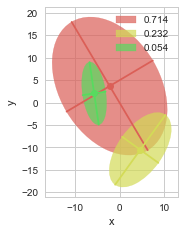

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.030      0.059  2.189976e-09      0.033       0.215

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.030      0.054  2.031367e-09      0.033       0.207

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.721  -2.403   3.446  12.861  15.507  -0.341
2  0.223   5.238  -9.691   6.763   8.586   0.580
3  0.055  -5.684   1.610   2.896   7.288  -0.398

GMM Plot Result
0.721455129052 [[-2.40345896  3.44600346]] [ 11.19558827  16.74889178] -149.465756095
0.22346970451 [[ 5.23771763 -9.69066715]] [ 4.82448026  9.80685108] 146.282808712
0.0550751664381 [[-5.68354369  1.60968361]] [ 2.61925068  7.39202583] -169.70274524


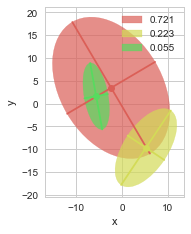

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.031      0.061  2.190962e-09      0.034       0.215

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.032      0.051  2.037539e-09      0.033       0.208

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.708  -2.514    3.776  12.740  15.416  -0.343
2  0.238   4.954  -10.056   6.936   8.746   0.560
3  0.053  -5.490    1.555   2.739   7.229  -0.321

GMM Plot Result
0.708499084044 [[-2.51449127  3.77647151]] [ 11.08467947  16.64592933] -149.622875795
0.238475742985 [[  4.95383647 -10.05631797]] [ 5.05097067  9.95460299] 146.343863414
0.0530251729706 [[-5.48985686  1.55484985]] [ 2.57221334  7.29036403] -172.077308369


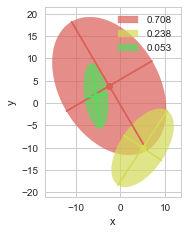

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.969  0.029      0.059  2.198150e-09      0.034       0.216

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.972  0.029      0.052  2.015216e-09      0.033       0.206

weight   mean_x  mean_y   sig_x   sig_y    corr
1  0.748   -0.973  -0.449  10.594  14.819  -0.223
2  0.158    6.181  -9.275   6.905   7.818   0.653
3  0.094  -15.784  15.437  12.725   8.308  -0.627

GMM Plot Result
0.748037987794 [[-0.97255431 -0.44864013]] [ 10.09320266  15.16443945] -163.468608211
0.158322870624 [[ 6.18123026 -9.27451096]] [ 4.30444989  9.50079035] 140.400078553
0.0936391415823 [[-15.78394115  15.43734687]] [  5.87498534  14.01562734] -117.489859981


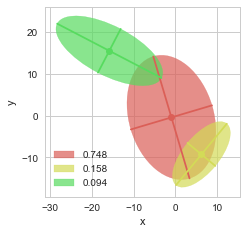

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.964  0.016      0.045  2.593551e-09      0.037       0.234

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.961  0.017      0.046  2.748993e-09      0.038       0.241

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.732  -2.087    3.248  12.667  15.616  -0.328
2  0.216   4.980  -10.050   6.798   8.342   0.564
3  0.051  -5.794    2.534   2.922   7.310  -0.498

GMM Plot Result
0.732239008798 [[-2.08741224  3.24776847]] [ 11.18190484  16.71173233] -151.370338471
0.216411746957 [[  4.98018082 -10.04955478]] [ 4.8812254   9.59062586] 145.033641635
0.0513492442454 [[-5.79426642  2.53354078]] [ 2.47881026  7.47162586] -167.313371987


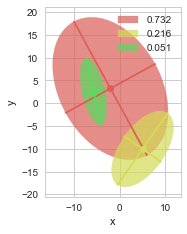

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.967  0.032      0.059  2.312963e-09      0.035       0.221

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.032      0.051  2.033930e-09      0.033       0.207

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.715  -2.343    3.646  12.705  15.371  -0.343
2  0.226   5.097  -10.194   6.955   8.476   0.550
3  0.058  -5.816    1.804   3.072   7.850  -0.395

GMM Plot Result
0.715152987741 [[-2.3428131   3.64576929]] [ 11.05367307  16.59880608] -149.610475544
0.226390339274 [[  5.09731015 -10.19410695]] [ 5.06100344  9.72662756] 144.941894298
0.0584566729856 [[-5.81577954  1.80388715]] [ 2.78436786  7.95679077] -169.976883798


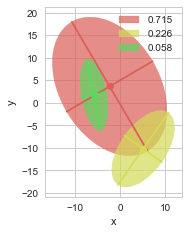

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.973  0.030      0.060  1.884282e-09      0.032       0.200

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.030      0.055  2.044339e-09      0.033       0.208

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.698  -2.509    4.128  12.844  15.303  -0.342
2  0.245   4.971  -10.221   6.954   8.546   0.545
3  0.057  -5.491    1.619   2.621   6.666  -0.149

GMM Plot Result
0.69768216386 [[-2.50913436  4.12777199]] [ 11.13254698  16.58897753] -148.615393658
0.245236652061 [[  4.97098437 -10.22138325]] [ 5.10486468  9.76378987] 145.433323068
0.0570811840788 [[-5.49122094  1.61863205]] [ 2.58581681  6.6798723 ] -176.043475617


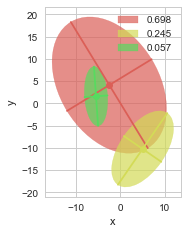

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.031      0.058  2.092880e-09      0.034       0.210

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.030      0.056  2.055352e-09      0.033       0.209

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.703  -2.572    4.161  12.769  15.395  -0.340
2  0.244   4.744  -10.256   7.201   8.376   0.537
3  0.053  -5.737    1.880   2.697   7.181  -0.294

GMM Plot Result
0.702669628763 [[-2.57156844  4.16145725]] [ 11.12015846  16.62484174] -149.479463767
0.244214204179 [[  4.74383481 -10.2559879 ]] [ 5.22828178  9.73024004] 142.891506826
0.0531161670575 [[-5.73692655  1.87983071]] [ 2.56045353  7.23062449] -172.797382233


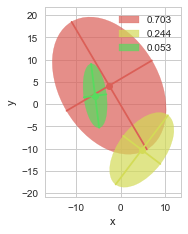

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.029      0.054  2.073108e-09      0.033       0.209

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.972  0.031      0.053  2.026490e-09      0.033       0.207

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.724  -2.388    3.446  12.813  15.456  -0.343
2  0.227   4.779  -10.158   6.952   8.387   0.587
3  0.050  -5.648    2.057   2.683   6.960  -0.318

GMM Plot Result
0.723538552017 [[-2.38793417  3.44562724]] [ 11.13679828  16.70454901] -149.411979226
0.226846647795 [[  4.77908235 -10.15846605]] [ 4.83405953  9.76175642] 143.909236277
0.0496148001877 [[-5.64844567  2.05731555]] [ 2.52250015  7.02003957] -171.975747112


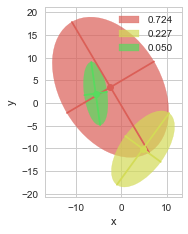

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.968  0.030      0.057  2.253148e-09      0.034       0.218

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.972  0.030      0.050  2.022401e-09      0.033       0.207

weight   mean_x  mean_y   sig_x   sig_y    corr
1  0.662   -1.403  -2.234  10.137  14.064  -0.277
2  0.173  -10.348  15.355  16.833   8.851  -0.391
3  0.165    6.971  -8.400   7.104   8.126   0.634

GMM Plot Result
0.6619631649 [[-1.40260192 -2.23446875]] [  9.40627716  14.5623939 ] -160.134350136
0.172883059357 [[-10.34814139  15.35502541]] [  7.9335228   17.28401597] -104.806438024
0.165153775743 [[ 6.97116549 -8.39975665]] [ 4.56271     9.78148389] 140.997581995


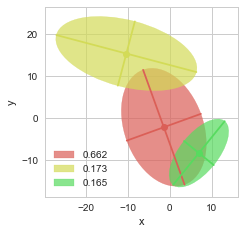

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.958  0.019      0.079  2.984244e-09      0.040       0.251

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.961  0.018      0.063  2.777636e-09      0.038       0.242


Wall time: 1min 19s


In [71]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [72]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 31776.0 10592.0
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.107861  0.052120  9.699176e-09    0.073099     0.453232  0.862059
1    0.106577  0.050965  9.568518e-09    0.070345     0.449789  0.865161
2    0.108281  0.051981  9.860868e-09    0.071825     0.456612  0.862561
3    0.109903  0.052024  9.791682e-09    0.071540     0.455141  0.863302

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.113754  0.052190  1.020010e-08    0.069072     0.463757  0.862340
1    0.119499  0.051415  1.056854e-08    0.077185     0.473254  0.853391
2    0.116813  0.057281  9.698676e-09    0.072633     0.453349  0.860762
3    0.110604  0.050684  9.804749e-09    0.071779     0.455421  0.860134

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.070258  0.018658  3.092866e-09    0.040092     0.255990  0.955939
1    0.073988  0.019441  3.233971e-09    0.041132     0.261464  0.954735
2    0.073288  0.019459  3.183841e-09    0.041419     0.259375  0.955284
3    0.070764  0.019600  3.073421e-09    0.040421     0.255046  0.957190

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.073025  0.021966  3.723476e-09    0.045334     0.280023  0.949947
1    0.095478  0.027754  3.159262e-09    0.041435     0.258825  0.955200
2    0.079490  0.016056  3.295958e-09    0.040525     0.264533  0.953743
3    0.087071  0.025987  3.769328e-09    0.044203     0.282201  0.945839

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.054327  0.030011  2.047653e-09    0.032791     0.208190  0.971017
1    0.049733  0.029416  1.912530e-09    0.031972     0.201233  0.973087
2    0.054695  0.028707  2.091391e-09    0.032733     0.210301  0.970897
3    0.052282  0.031552  2.065494e-09    0.033451     0.208933  0.970934

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.054280  0.033986  2.228189e-09    0.034618     0.216934  0.969429
1    0.064598  0.032705  2.720214e-09    0.037254     0.239587  0.962074
2    0.066516  0.026408  2.225256e-09    0.035945     0.217103  0.967915
3    0.060735  0.028860  2.371940e-09    0.034113     0.224343  0.966978

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.054786  0.028620  1.525381e-09    0.028339     0.179524  0.978496
1    0.064998  0.020105  1.355355e-09    0.026906     0.169366  0.980997
2    0.052065  0.029452  1.491179e-09    0.027502     0.177615  0.979215
3    0.026003  0.010374  1.337633e-09    0.027031     0.168294  0.981063

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.069563  0.029696  1.709081e-09    0.030197     0.190515  0.976305
1    0.066305  0.018905  2.063444e-09    0.032231     0.208808  0.970887
2    0.059754  0.030970  1.859678e-09    0.033397     0.198346  0.973331
3    0.033387  0.013160  2.105659e-09    0.031046     0.210785  0.971174

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.016720  0.007596  5.940881e-10    0.017592     0.112068  0.991660
1    0.017388  0.007406  6.138223e-10    0.017687     0.113956  0.991403
2    0.017297  0.007922  6.123021e-10    0.018151     0.113901  0.991397
3    0.060806  0.016623  9.373847e-10    0.022612     0.140764  0.986769

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.026101  0.007808  9.723446e-10    0.022944     0.143578  0.986336
1    0.025138  0.011638  1.040248e-09    0.024198     0.148344  0.985299
2    0.022199  0.021596  1.183896e-09    0.024338     0.157898  0.983457
3    0.062827  0.017161  1.703468e-09    0.028332     0.190072  0.976481

Wall time: 3min 24s


In [73]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.108155  0.051772  9.730061e-09    0.071702     0.453694  0.863271
2    0.072075  0.019290  3.146025e-09    0.040766     0.257969  0.955787
3    0.052759  0.029921  2.029267e-09    0.032737     0.207164  0.971484
4    0.049463  0.022138  1.427387e-09    0.027445     0.173700  0.979943
5    0.028053  0.009887  6.893993e-10    0.019010     0.120172  0.990307

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.115168  0.052892  1.006801e-08    0.072667     0.461446  0.859157
2    0.083766  0.022940  3.487006e-09    0.042874     0.271396  0.951182
3    0.061532  0.030490  2.386400e-09    0.035482     0.224491  0.966599
4    0.057252  0.023183  1.934465e-09    0.031718     0.202113  0.972924
5    0.034066  0.014551  1.224989e-09    0.024953     0.159973  0.982893

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


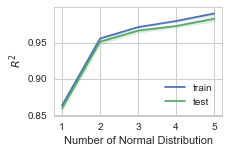

K_S


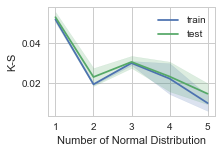

Chi_square


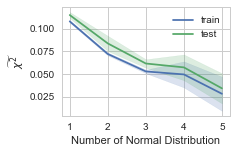

In [74]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

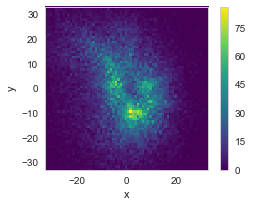

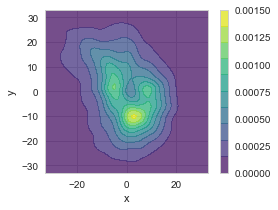

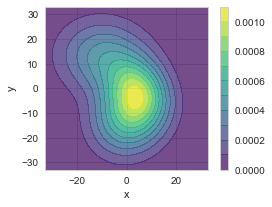

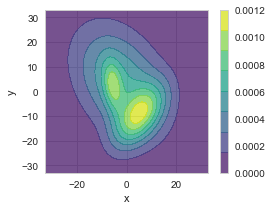

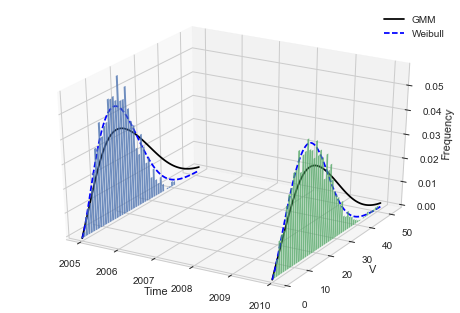

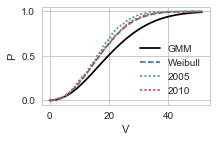

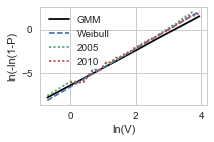

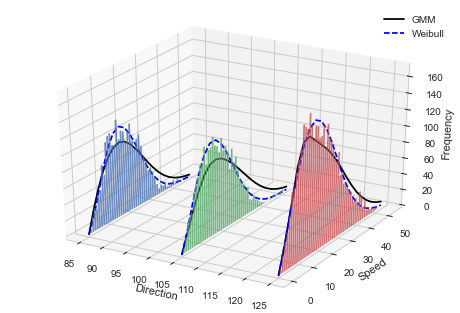

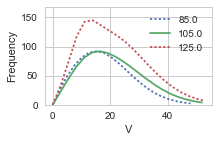

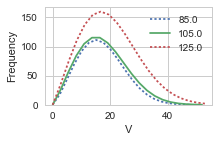

In [75]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [76]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)